## Import

In [432]:
from matplotlib import pyplot as plt

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.callbacks import History
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam, Adamax

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta
from tensorflow.keras import layers

from keras.layers import Conv1D, MaxPooling1D


from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score

import sklearn.metrics as metrics

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

In [433]:
data = pd.read_csv("cocacola.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...,...
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900


# Dataset info

In [434]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [435]:
data.index = data.pop('Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...
2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800


In [436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


In [437]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


In [438]:
nan_count = data.isnull().sum().sort_values()
print(nan_count)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [439]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

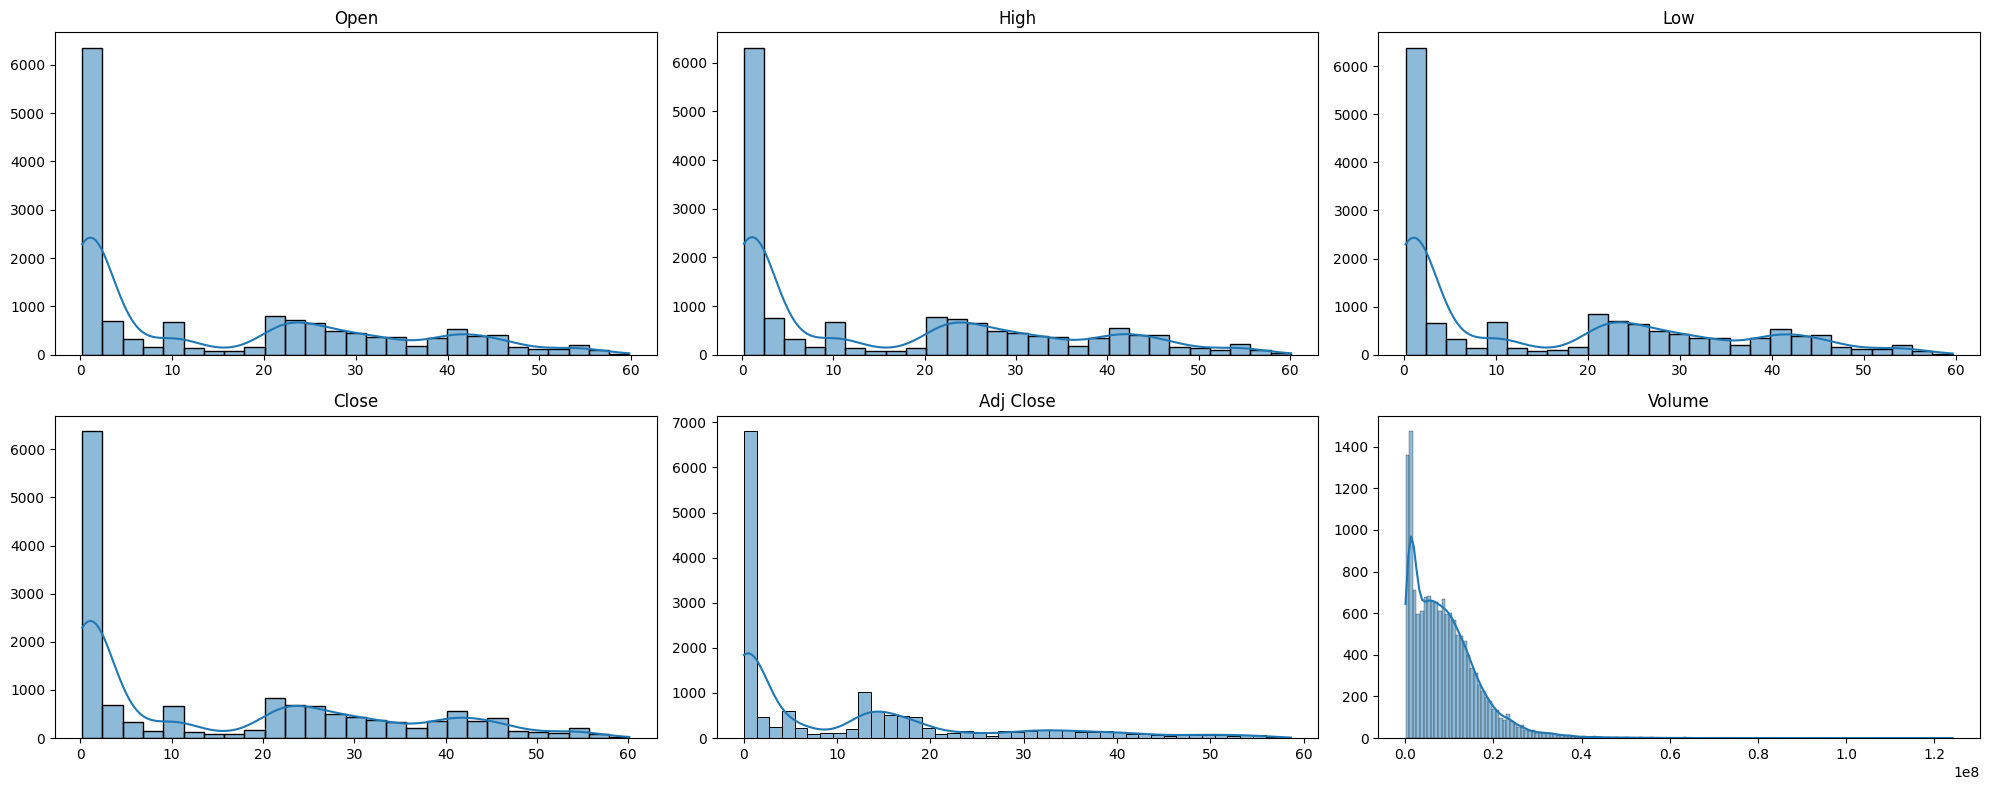

In [440]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

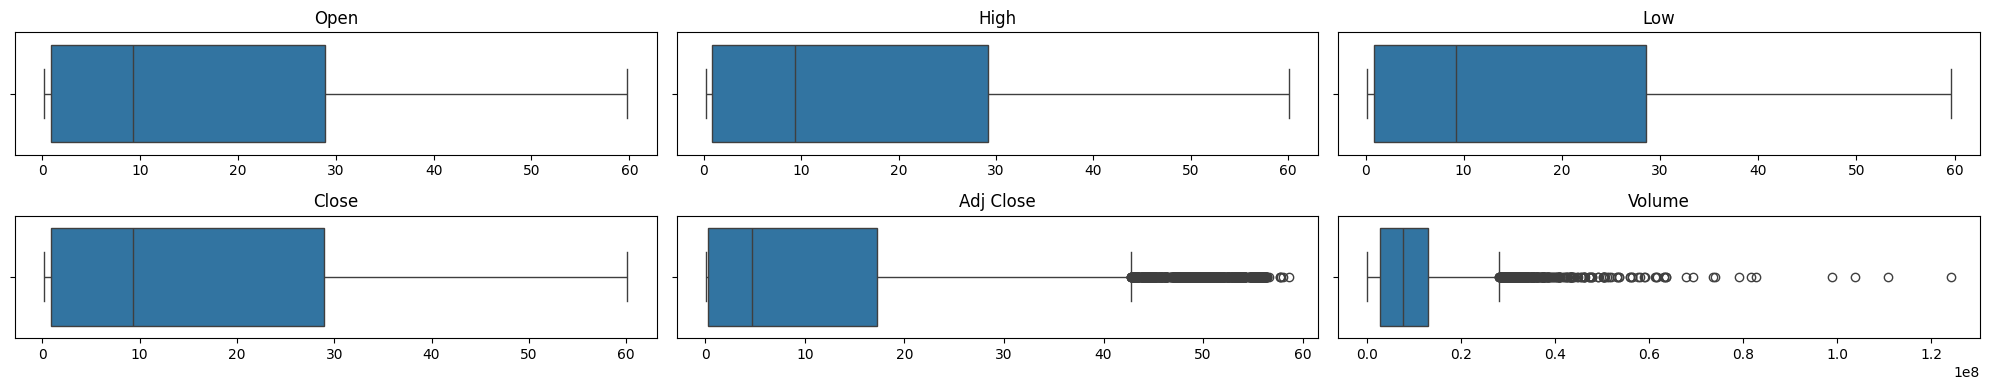

In [441]:
fig, axes = plt.subplots(2, 3, figsize=(20, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [442]:
def plot(data, columns, x):
    fig, axes = plt.subplots(3, 2, figsize=(20, 8))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.lineplot(x=x, y=column_name, data=data, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

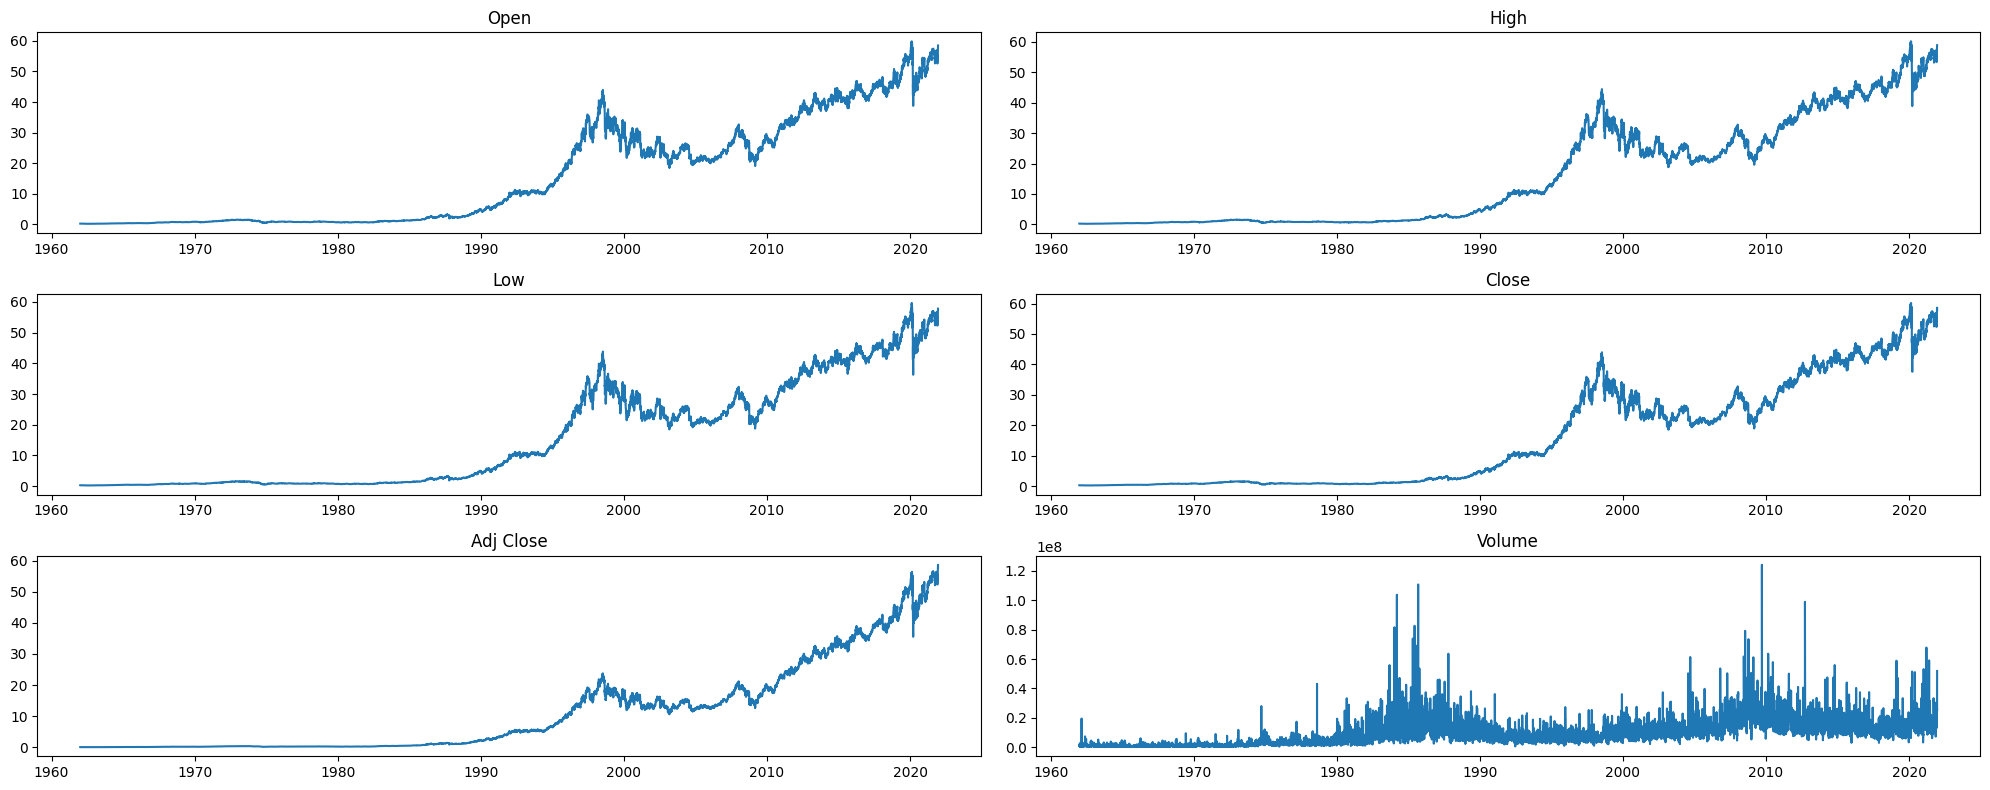

In [443]:
plot(data, columns, 'Date')

In [444]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


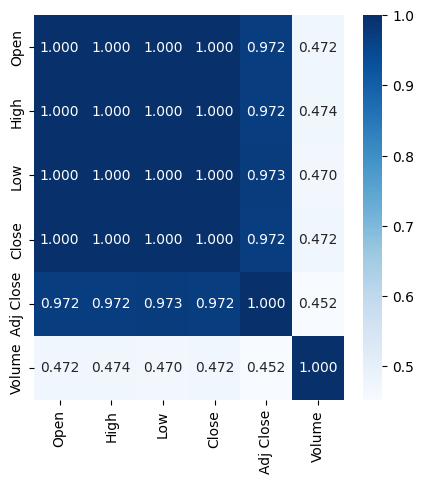

In [445]:
df_corr = data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

# Podela podataka na test, train i val

Podela podataka na train, val i test skup (70%, 20%, 10%).

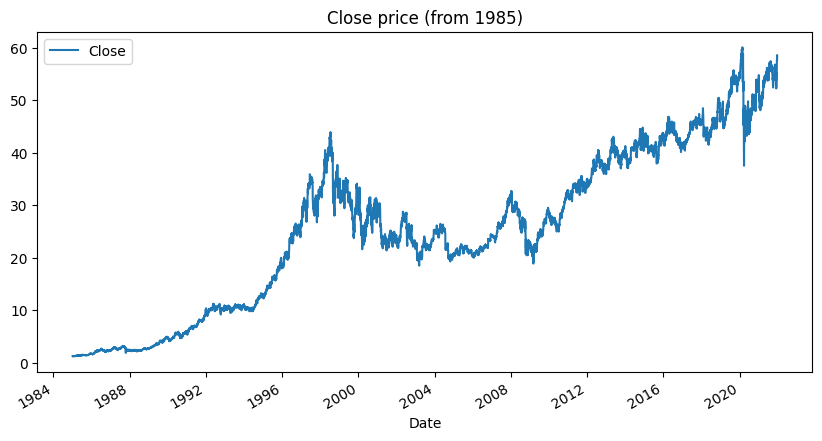

In [446]:
relevant_data = data["1985":]

relevant_data[["Close"]].plot(figsize=(10, 5))
plt.title("Close price (from 1985)")
plt.show()

In [447]:
data = data["1985":]

In [448]:
data = data.drop(columns=['High', 'Low', 'Open', 'Adj Close', 'Volume'])

In [449]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

print("Train size : ", train_df.shape, "\n"
      "Validation size : ", val_df.shape, "\n"
      "Test Size : ", test_df.shape)

train_df

Train size :  (6522, 1) 
Validation size :  (1864, 1) 
Test Size :  (932, 1)


,Close
Date,
1985-01-02,1.289063
1985-01-03,1.302083
1985-01-04,1.299479
1985-01-07,1.307292
1985-01-08,1.309896
...,...
2010-11-03,30.975000
2010-11-04,31.225000
2010-11-05,31.290001


In [450]:
train_df.columns

Index(['Close'], dtype='object')

# Normalizacija podataka

In [451]:
scaler = MinMaxScaler()

col = ['Close']

train_df[col] = scaler.fit_transform(train_df[col])
val_df[col] = scaler.transform(val_df[col])
test_df[col] = scaler.transform(test_df[col])


In [452]:
target = ['Close']

def split_into_windows(data, window_size, step_size):
    X, Y = [], []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data.iloc[i:i+window_size])
        Y.append(data.iloc[i+window_size][target])
    return np.array(X), np.array(Y)

In [453]:
X_train, Y_train = split_into_windows(train_df.astype(np.float32), 10, 1)
X_val, Y_val = split_into_windows(val_df.astype(np.float32), 10, 1)
X_test, Y_test = split_into_windows(test_df.astype(np.float32), 10, 1)

In [454]:
print("Train size : ", X_train.shape, Y_train.shape,"\n",
      "Val size : ", X_val.shape, Y_val.shape,"\n",
      "Test Size : ", X_test.shape, Y_train.shape)

Train size :  (6512, 10, 1) (6512, 1) 
 Val size :  (1854, 10, 1) (1854, 1) 
 Test Size :  (922, 10, 1) (6512, 1)


# custom loss

In [455]:

def custom_loss(y_true, y_pred):

    error = tf.abs(y_true - y_pred)
    
    punishment_factor = 2.0
    
    weighted_error = tf.where(error < 1, error, punishment_factor * error)
    
    return tf.reduce_mean(weighted_error)

In [456]:
import tensorflow.keras.backend as K

def custom_loss_1(y_true, y_pred):
    #extract the "next day's price" of tensor
    y_true_next = y_true[1:]
    y_pred_next = y_pred[1:]
    #extract the "today's price" of tensor
    y_true_tdy = y_true[:-1]
    y_pred_tdy = y_pred[:-1]
    #substract to get up/down movement of the two tensors
    y_true_diff = tf.subtract(y_true_next, y_true_tdy)
    y_pred_diff = tf.subtract(y_pred_next, y_pred_tdy)
    #create a standard tensor with zero value for comparison
    standard = tf.zeros_like(y_pred_diff)
    #compare with the standard; if true, UP; else DOWN
    y_true_move = tf.greater_equal(y_true_diff, standard)
    y_pred_move = tf.greater_equal(y_pred_diff, standard)

    #find indices where the directions are not the same
    condition = tf.not_equal(y_true_move, y_pred_move)
    indices = tf.where(condition)
    ones = tf.ones_like(indices)
    indices = tf.add(indices, ones)

    updates = K.cast(tf.ones_like(indices), dtype='float32')
    alpha = 1000
    direction_loss = tf.Variable(tf.ones_like(y_pred), dtype='float32')
    direction_loss = tf.tensor_scatter_nd_update(direction_loss, indices[:,tf.newaxis], alpha*updates)
    custom_loss = K.mean(tf.multiply(K.square(y_true - y_pred), direction_loss), axis=-1)

    return custom_loss

# pomocne funkcije

In [457]:
results = pd.DataFrame(columns=['Model', 'mean abs', 'R2', 'mean sqrd'])


In [458]:

def print_result(model, model_name, X_test, y_test, end=-1):

    y_pred = model.predict(X_test)

    mean_abs = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mean_sqrd = metrics.mean_squared_error(y_test, y_pred)

    results.loc[len(results)] = [model_name, mean_abs, r2, mean_sqrd]

    plt.plot(y_test, label='True')   
    plt.plot(y_pred, label='Predicted') 
    plt.tight_layout()  
    plt.show()


    display(results)



In [459]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)


In [460]:
history = History()
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's Training & Validation loss across epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Modeli


Epoch: One pass through all of the rows in the training dataset
Batch: One or more samples considered by the model within an epoch before weights are updated

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. Using a sigmoid on the output layer ensures your network output is between 0 and 1 and is easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.



## SimpleRNN

### Adam

#### simple RNN

In [461]:

model_srnn = Sequential()
model_srnn.add(SimpleRNN(units = 32, activation = "relu", return_sequences = False, input_shape = (X_train.shape[1],1)))
model_srnn.add(Dense(units = 1))
model_srnn.compile(optimizer=Adam(learning_rate=0.001), loss = "mean_squared_error")
history = model_srnn.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs = 50, batch_size = 32, callbacks=[ history, early_stopping] )


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1368 - val_loss: 1.3340e-04
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0407e-04 - val_loss: 9.2471e-05
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.1159e-05 - val_loss: 1.1327e-04
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.2248e-05 - val_loss: 1.7874e-04
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.2036e-05 - val_loss: 9.2555e-05
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.9261e-05 - val_loss: 1.2485e-04
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.5145e-05 - val_loss: 9.0931e-05
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5757e-05 - val_loss: 1.0666e-04
Epoch 9/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6462e-05 - val_loss: 1.1014e-04
Epoch 10/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.7124e-05 - val_loss: 1.1198e-04
Epoch 11/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.8410e-05 - 

In [462]:
model_srnn.evaluate(X_test,Y_test)
model_srnn.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5141e-04


Model: "sequential_151"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_45 (SimpleRNN)       │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_298 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,365 (13.15 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,244 (8.77 KB)

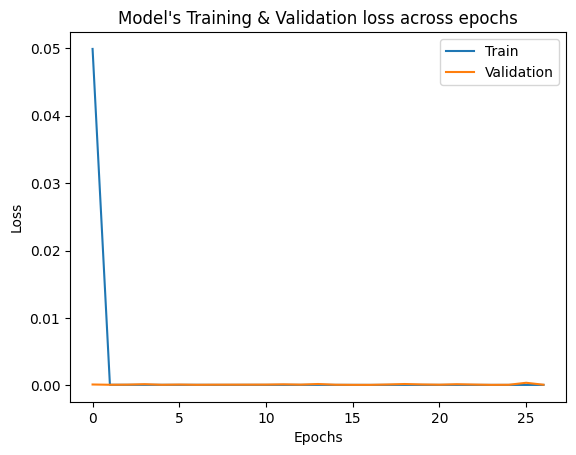

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


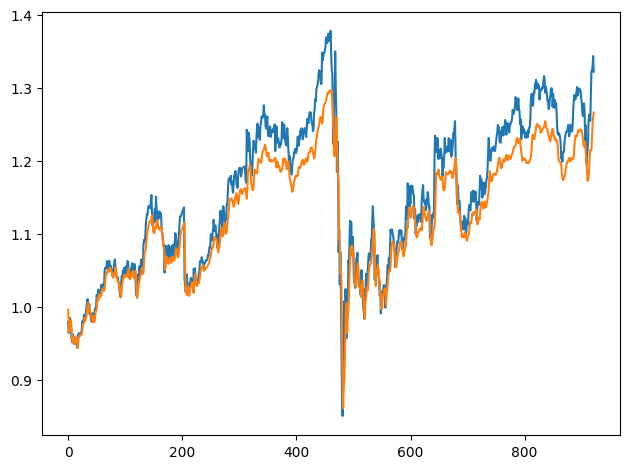

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.00131


In [463]:

plotloss(history)
print_result(model_srnn, 'SimpleRNN U32, Adam', X_test, Y_test, 200)


#### 50 units and early stopping

In [464]:
model = Sequential()

model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))

model.add(Dense(units = 1, activation='sigmoid')) 

model.compile(optimizer = Adam(learning_rate=0.001), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, validation_data=(X_val, Y_val),  epochs = 50, batch_size = 32, callbacks=[ history, early_stopping])

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0700 - root_mean_squared_error: 0.1021 - val_loss: 0.0260 - val_mean_absolute_error: 0.1539 - val_root_mean_squared_error: 0.1613
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0010 - mean_absolute_error: 0.0227 - root_mean_squared_error: 0.0323 - val_loss: 0.0239 - val_mean_absolute_error: 0.1503 - val_root_mean_squared_error: 0.1547
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.3666e-04 - mean_absolute_error: 0.0175 - root_mean_squared_error: 0.0252 - val_loss: 0.0150 - val_mean_absolute_error: 0.1175 - val_root_mean_squared_error: 0.1222
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.0600e-04 - mean_absolute_error: 0.0155 - root_mean_squared_error: 0.0225 - val_loss: 0.0145 - val_mean_absolute_error: 0.1169 - val_root_mean_squared_error: 0.1202
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 4.7759e-04 - mean_absolute_error: 0.0154 - root_me

In [465]:
model.evaluate(X_test,Y_test)
model.summary()


20/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.2532 - root_mean_squared_error: 0.2592

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781 - mean_absolute_error: 0.2693 - root_mean_squared_error: 0.2765


Model: "sequential_152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_46 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_131 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_47 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_132 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_48 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_49 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_299 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,405 (208.62 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,604 (139.08 KB)

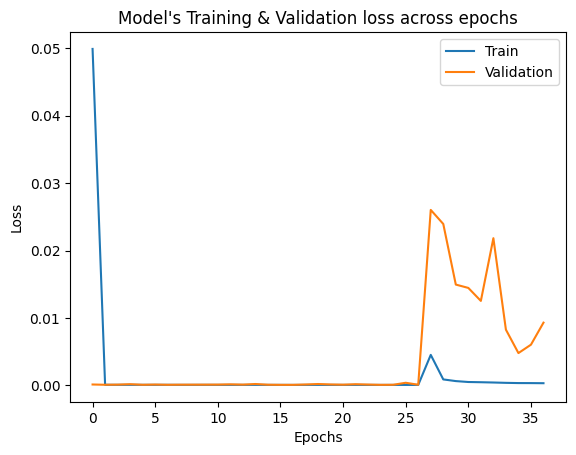

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


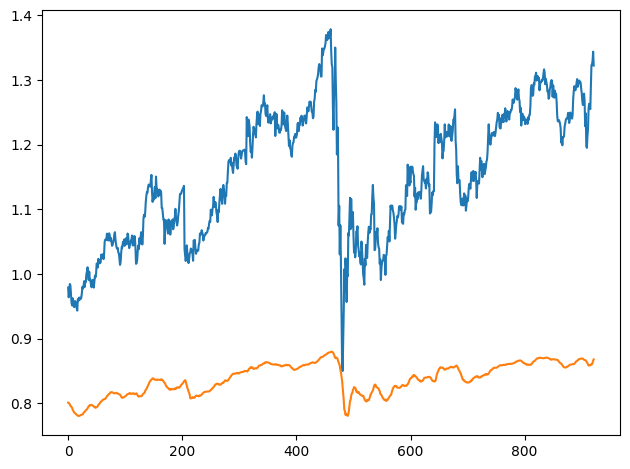

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345


In [466]:

plotloss(history)
print_result(model, 'SimpleRNN L4 U50, Dropout, Adam ', X_test, Y_test, 200)

### Convolution

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1284 - val_loss: 0.0186
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0046 - val_loss: 0.0025
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 8/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 9/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 10/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - val_loss: 0.0025


Model: "sequential_153"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_133 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_50 (SimpleRNN)       │ (None, 20)             │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_300 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_301 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,193 (28.10 KB)

 Trainable params: 2,397 (9.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,796 (18.74 KB)

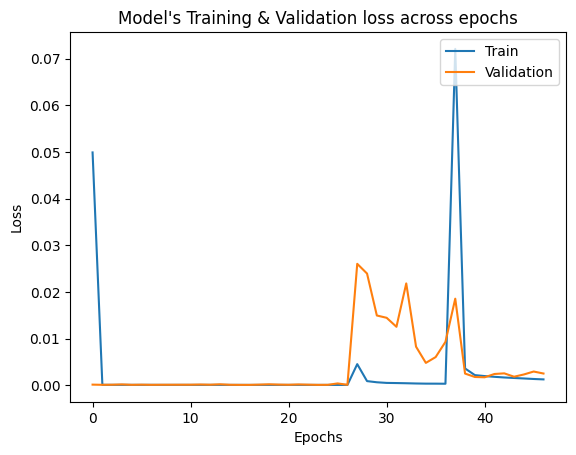

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


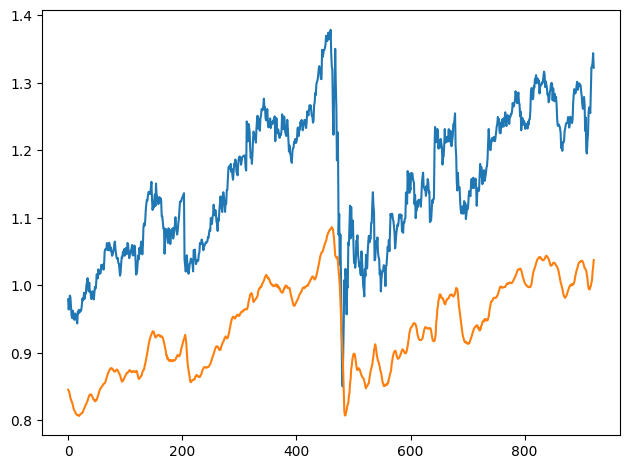

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669


In [467]:
model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))),
model_conv.add(MaxPooling1D(pool_size=2)),
model_conv.add(Dropout(0.2)),
model_conv.add(SimpleRNN(units = 20, activation = "relu", return_sequences = False, input_shape = (X_train.shape[1],1)))
model_conv.add(Dense(20, activation='relu'))
model_conv.add(Dense(1))
model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv + SimpleRNN U20 dropout  Adam', X_test, Y_test)

### SGD

In [468]:

model = Sequential()

model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))

model.add(Dense(units = 1, activation='sigmoid')) 

model.compile(optimizer = SGD(learning_rate=0.001,decay=1e-6,  momentum=0.9, nesterov=True), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs = 60, batch_size = 32,callbacks=[ history, early_stopping] )


Epoch 1/60


204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0452 - mean_absolute_error: 0.1711 - root_mean_squared_error: 0.2089 - val_loss: 0.0591 - val_mean_absolute_error: 0.2312 - val_root_mean_squared_error: 0.2431
Epoch 2/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0050 - mean_absolute_error: 0.0563 - root_mean_squared_error: 0.0704 - val_loss: 0.0497 - val_mean_absolute_error: 0.2107 - val_root_mean_squared_error: 0.2229
Epoch 3/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0038 - mean_absolute_error: 0.0500 - root_mean_squared_error: 0.0617 - val_loss: 0.0453 - val_mean_absolute_error: 0.2010 - val_root_mean_squared_error: 0.2127
Epoch 4/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0034 - mean_absolute_error: 0.0466 - root_mean_squared_error: 0.0582 - val_loss: 0.0435 - val_mean_absolute_error: 0.1974 - val_root_mean_squared_error: 0.2085
Epoch 5/60
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0442 - root_mean_squared_e

In [469]:
model.evaluate(X_test,Y_test)
model.summary()


22/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1479 - mean_absolute_error: 0.3749 - root_mean_squared_error: 0.3814

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1611 - mean_absolute_error: 0.3907 - root_mean_squared_error: 0.3981


Model: "sequential_154"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_51 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_134 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_52 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_53 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_54 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_302 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

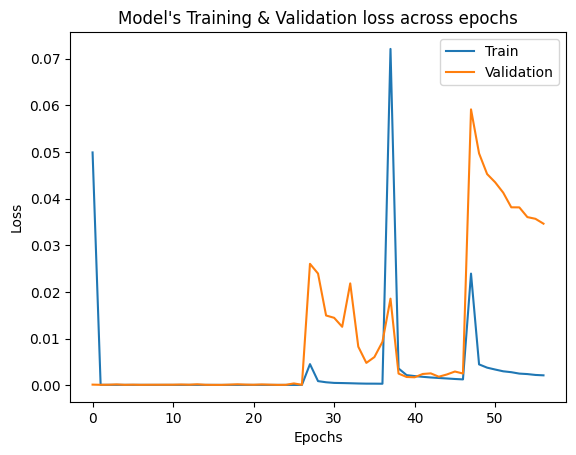

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


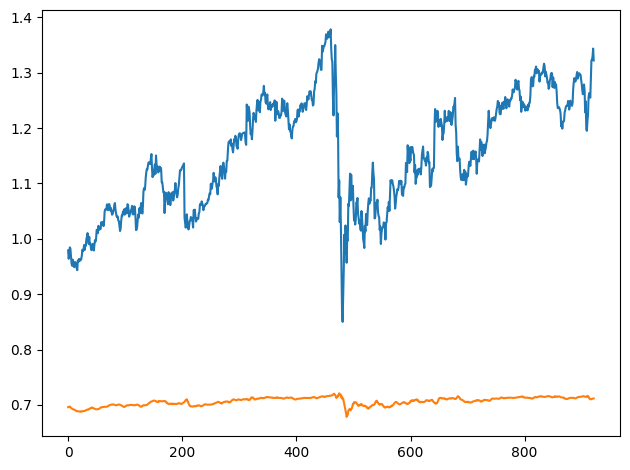

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129


In [470]:
plotloss(history)
print_result(model, 'SimpleRNN U32, Dropout, SGD 0.001', X_test, Y_test, 200)

## LSTM

### Adam

#### LSTM  64

In [471]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2115 - mean_absolute_error: 0.3862 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2119 - mean_absolute_error: 0.3837 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2129 - mean_absolute_error: 0.3875 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2182 - mean_absolute_error: 0.3952 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2089 - mean_absolute_error: 0.3815 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2118 - mean_absolute_error: 0.3865 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2138 - mean_absolute_error: 0.3873 - val_loss: 0.

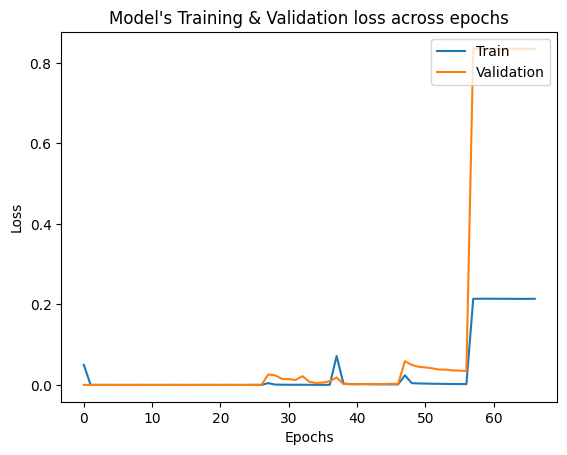

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


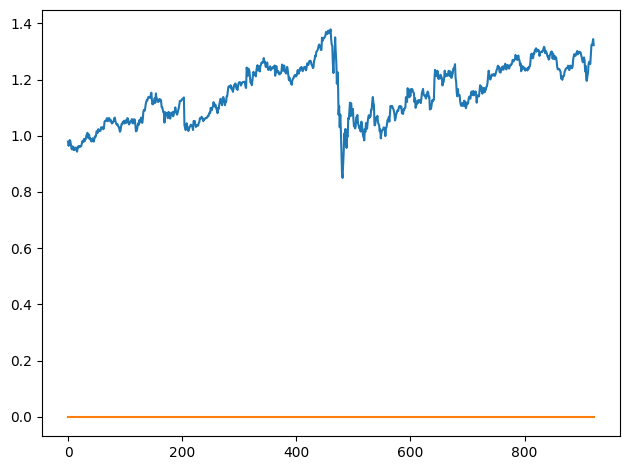

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988


In [472]:
plotloss(history)

print_result(model, 'LSTM U64, Adam', X_test, Y_test)


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0266 - mean_absolute_error: 0.0864 - val_loss: 4.6874e-04 - val_mean_absolute_error: 0.0183
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.1823e-04 - mean_absolute_error: 0.0095 - val_loss: 6.6778e-04 - val_mean_absolute_error: 0.0225
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8808e-04 - mean_absolute_error: 0.0085 - val_loss: 2.1874e-04 - val_mean_absolute_error: 0.0112
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6968e-04 - mean_absolute_error: 0.0084 - val_loss: 1.7900e-04 - val_mean_absolute_error: 0.0102
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7652e-04 - mean_absolute_error: 0.0086 - val_loss: 1.8495e-04 - val_mean_absolute_error: 0.0106
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6799e-04 - mean_absolute_error: 0.0080 - val_loss: 3.1421e-04 - val_mean_absolute_error: 0.0150
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.5380e

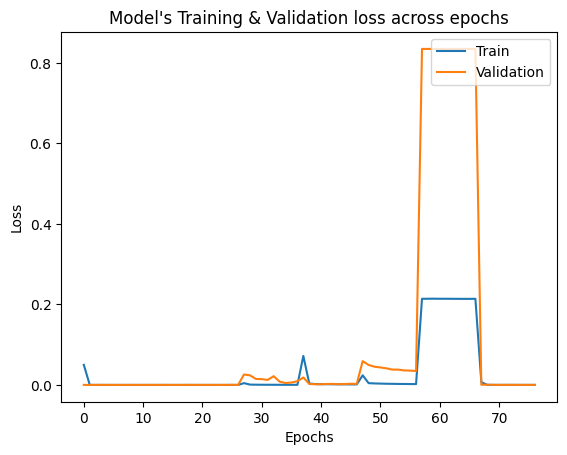

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


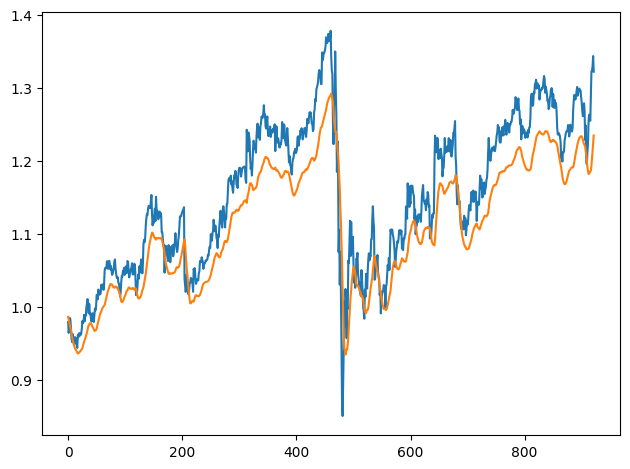

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609


In [473]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))

model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="relu"))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])

plotloss(history)
print_result(model, 'LSTM U64, fully connected, Adam', X_test, Y_test)


#### LSTM 2 layers 64,32

In [474]:
regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(64, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(32, return_sequences = False))
regressorLSTM.add(Dense(32, activation="relu"))
regressorLSTM.add(Dense(1,activation="sigmoid"))
regressorLSTM.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
regressorLSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0265 - mean_absolute_error: 0.1011 - val_loss: 0.0156 - val_mean_absolute_error: 0.1100
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.9419e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0060 - val_mean_absolute_error: 0.0648
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.2642e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0044 - val_mean_absolute_error: 0.0521
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.1637e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0028 - val_mean_absolute_error: 0.0402
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.8367e-04 - mean_absolute_error: 0.0136 - val_loss: 0.0030 - val_mean_absolute_error: 0.0421
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.3126e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0025 - val_mean_absolute_error: 0.0388
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.1675e-04 - mean_absolute_err

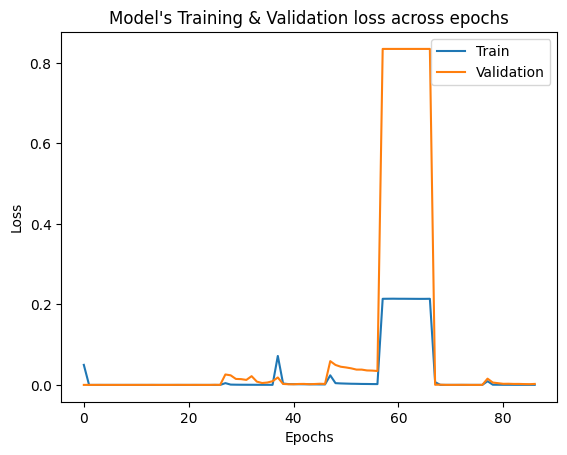

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


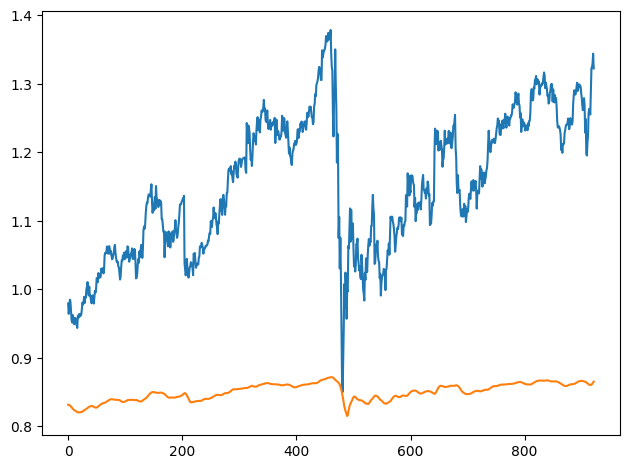

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965


In [475]:

plotloss(history)
print_result(regressorLSTM, 'LSTM L2 U64,32  Adam', X_test, Y_test)


In [476]:

regressorLSTM.summary()
result = regressorLSTM.evaluate(X_test,Y_test)


Model: "sequential_157"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_159 (LSTM)                 │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_160 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_307 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_308 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,205 (356.27 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,804 (237.52 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0701 - mean_absolute_error: 0.2503


#### LSTM 32,16

In [477]:

regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(32, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(16, return_sequences = False))
regressorLSTM.add(Dense(1,activation="sigmoid"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error"])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=16, callbacks=[history, early_stopping])



Epoch 1/200


407/407 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0209 - mean_absolute_error: 0.0874 - val_loss: 0.0157 - val_mean_absolute_error: 0.1118
Epoch 2/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.4809e-04 - mean_absolute_error: 0.0202 - val_loss: 0.0042 - val_mean_absolute_error: 0.0514
Epoch 3/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.0231e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0033 - val_mean_absolute_error: 0.0447
Epoch 4/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.5987e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0031 - val_mean_absolute_error: 0.0439
Epoch 5/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.1378e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0025 - val_mean_absolute_error: 0.0384
Epoch 6/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4.0858e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0024 - val_mean_absolute_error: 0.0382
Epoch 7/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.7388e-04 - mean_absolut

In [478]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0658 - mean_absolute_error: 0.2431


Model: "sequential_158"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_161 (LSTM)                 │ (None, 10, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_135 (Dropout)           │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_162 (LSTM)                 │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_309 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,517 (87.96 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,012 (58.64 KB)

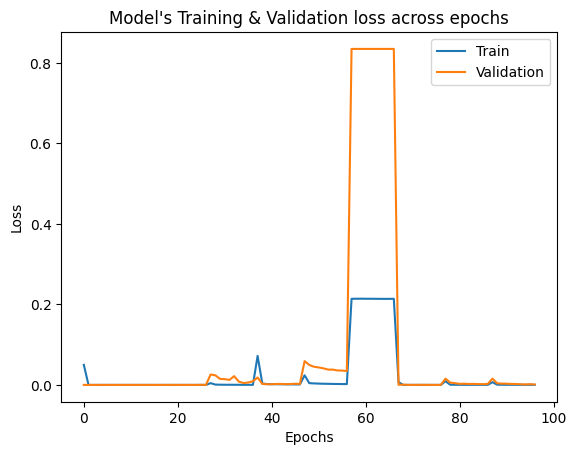

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


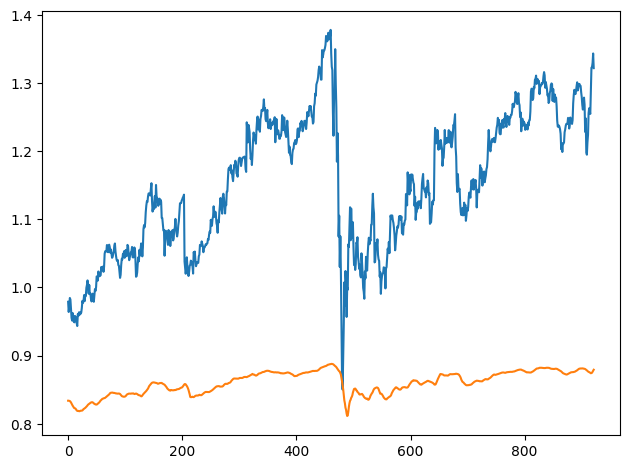

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282


In [479]:

plotloss(history)
print_result(regressorLSTM, 'LSTM U32, 16, Dropout, Adam ', X_test, Y_test)



#### LSTM 4 layers 50 units dropout

In [480]:
regressorLSTM = Sequential()
regressorLSTM.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))
regressorLSTM.add(Dense(units=1,activation='relu'))
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])


Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 0.2125 - mean_absolute_error: 0.3879 - val_loss: 0.8351 - val_mean_absolute_error: 0.9088
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.2144 - mean_absolute_error: 0.3904 - val_loss: 0.8351 - val_mean_absolute_error: 0.9088
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.2163 - mean_absolute_error: 0.3899 - val_loss: 0.8351 - val_mean_absolute_error: 0.9088
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.2176 - mean_absolute_error: 0.3926 - val_loss: 0.8351 - val_mean_absolute_error: 0.9088
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.2170 - mean_absolute_error: 0.3925 - val_loss: 0.8351 - val_mean_absolute_error: 0.9088
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.1886 - mean_absolute_error: 0.3444 - val_loss: 0.0017 - val_mean_absolute_error: 0.0342
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.3064e-04 - mean_absolute_error: 0.0

In [481]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


19/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1495 - mean_absolute_error: 1.0684

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2037 - mean_absolute_error: 1.0927


Model: "sequential_159"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_163 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_136 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_164 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_165 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_166 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_310 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

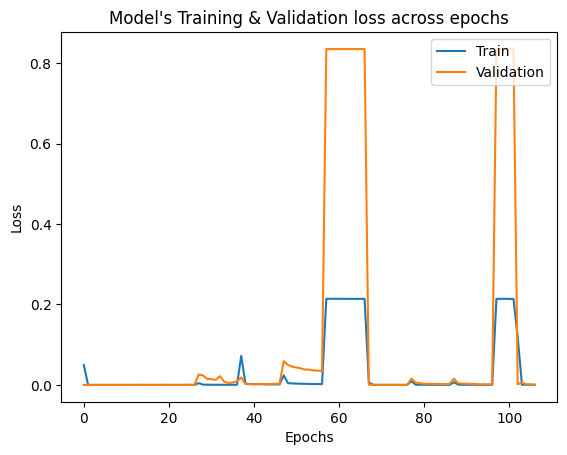

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


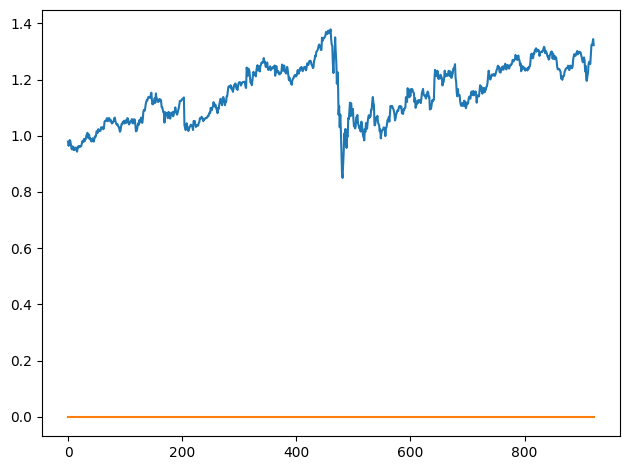

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988


In [482]:

plotloss(history)
print_result(regressorLSTM, 'LSTM L4 U50, dropout, Adam', X_test, Y_test)


### Adamax

#### 64 units

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0248 - mean_absolute_error: 0.0911 - val_loss: 6.5758e-04 - val_mean_absolute_error: 0.0206
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9115e-04 - mean_absolute_error: 0.0122 - val_loss: 3.4769e-04 - val_mean_absolute_error: 0.0142
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4614e-04 - mean_absolute_error: 0.0108 - val_loss: 3.6308e-04 - val_mean_absolute_error: 0.0146
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2559e-04 - mean_absolute_error: 0.0100 - val_loss: 2.6262e-04 - val_mean_absolute_error: 0.0128
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2431e-04 - mean_absolute_error: 0.0096 - val_loss: 2.2954e-04 - val_mean_absolute_error: 0.0115
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2043e-04 - mean_absolute_error: 0.0092 - val_loss: 2.9749e-04 - val_mean_absolute_error: 0.0138
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3462e

Model: "sequential_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_167 (LSTM)                 │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_311 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - mean_absolute_error: 0.0346


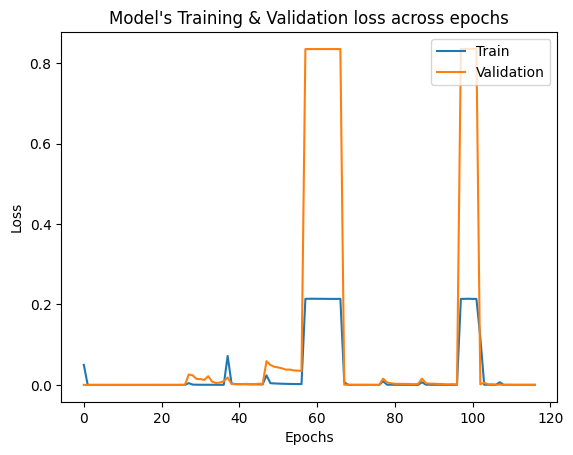

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


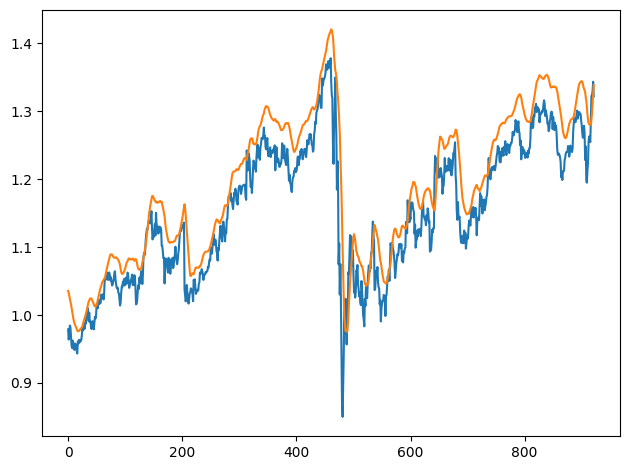

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [483]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adamax(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM U64 Adamax', X_test, Y_test)

#### lstm 2 layers 64,32 units, dropout

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0406 - mean_absolute_error: 0.1259 - val_loss: 9.3537e-04 - val_mean_absolute_error: 0.0268
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0021 - mean_absolute_error: 0.0319 - val_loss: 8.6733e-04 - val_mean_absolute_error: 0.0252
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0019 - mean_absolute_error: 0.0298 - val_loss: 0.0053 - val_mean_absolute_error: 0.0691
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0016 - mean_absolute_error: 0.0270 - val_loss: 0.0076 - val_mean_absolute_error: 0.0838
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0257 - val_loss: 0.0069 - val_mean_absolute_error: 0.0798
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0013 - mean_absolute_error: 0.0243 - val_loss: 0.0068 - val_mean_absolute_error: 0.0791
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0012 - mean_absolute_error: 0.0240 -

Model: "sequential_161"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_168 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_137 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_169 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_138 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_312 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_313 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - mean_absolute_error: 0.0476    


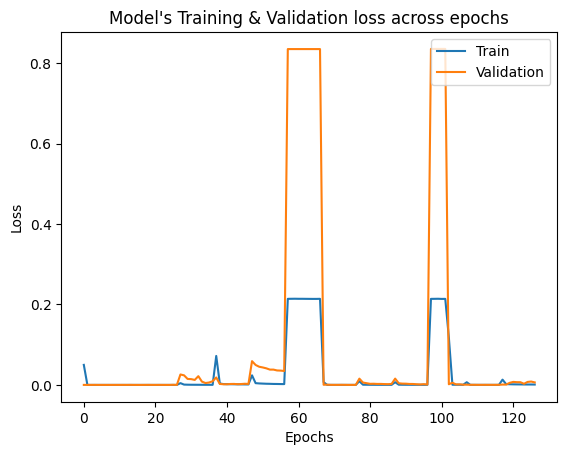

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


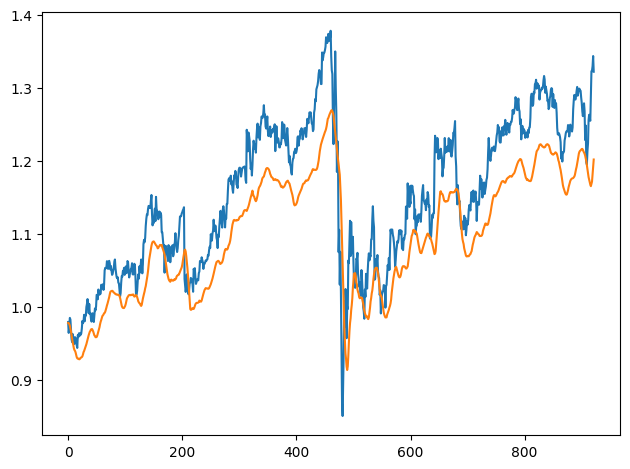

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [484]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adamax(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout  Adamax ', X_test, Y_test)

### Adagrad

#### LSTM 2 layers 50units dropout

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0921 - mean_absolute_error: 0.2494 - val_loss: 0.1643 - val_mean_absolute_error: 0.3994
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0321 - mean_absolute_error: 0.1580 - val_loss: 0.1069 - val_mean_absolute_error: 0.3209
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0262 - mean_absolute_error: 0.1395 - val_loss: 0.0850 - val_mean_absolute_error: 0.2861
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0208 - mean_absolute_error: 0.1228 - val_loss: 0.0673 - val_mean_absolute_error: 0.2544
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0167 - mean_absolute_error: 0.1102 - val_loss: 0.0481 - val_mean_absolute_error: 0.2145
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0128 - mean_absolute_error: 0.0954 - val_loss: 0.0362 - val_mean_absolute_error: 0.1858
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0095 - mean_absolute_error: 0.0822 - val_loss: 0

Model: "sequential_162"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_170 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_139 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_171 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_140 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_314 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_315 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,804 (249.24 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,903 (124.62 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2921 - mean_absolute_error: 0.5352


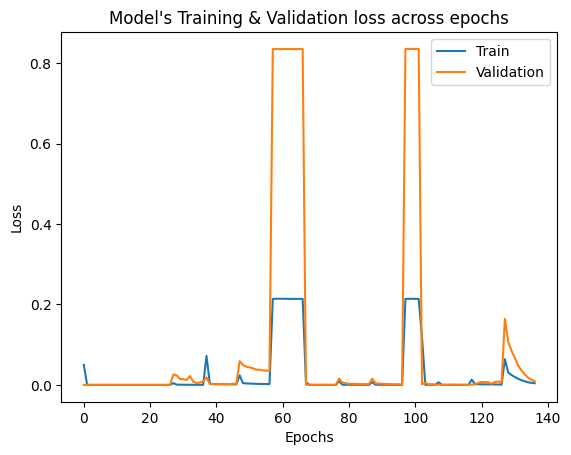

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


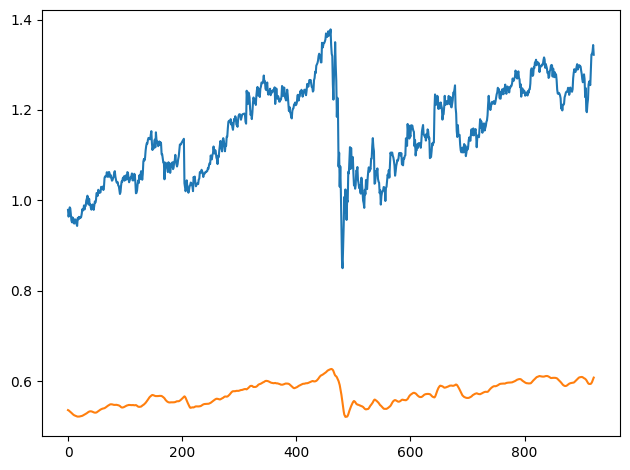

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [485]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adagrad(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout  Adagrad ', X_test, Y_test)

### Adadelta

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2182 - mean_absolute_error: 0.3949 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2129 - mean_absolute_error: 0.3890 - val_loss: 0.8185 - val_mean_absolute_error: 0.8998
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2033 - mean_absolute_error: 0.3758 - val_loss: 0.7626 - val_mean_absolute_error: 0.8684
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1929 - mean_absolute_error: 0.3654 - val_loss: 0.7121 - val_mean_absolute_error: 0.8390
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1725 - mean_absolute_error: 0.3406 - val_loss: 0.6697 - val_mean_absolute_error: 0.8135
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1610 - mean_absolute_error: 0.3306 - val_loss: 0.6294 - val_mean_absolute_error: 0.7885
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1485 - mean_absolute_error: 0.3159 - val_los

Model: "sequential_163"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_172 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_141 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_173 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_142 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_316 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_317 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2037 - mean_absolute_error: 1.0927


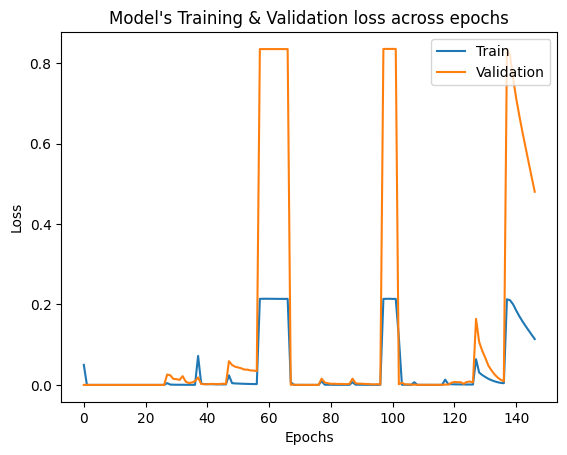

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


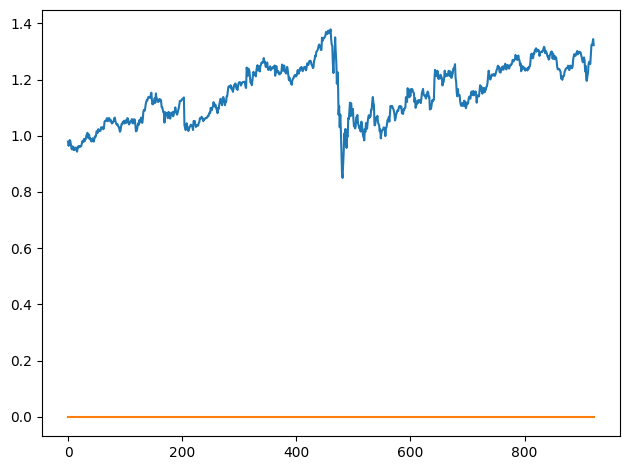

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [486]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adadelta(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout  Adadelta ', X_test, Y_test)

### Custom loss 

Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - val_loss: 0.0356 - val_mean_absolute_error: 0.0356
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - val_loss: 0.0626 - val_mean_absolute_error: 0.0626
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - val_loss: 0.0334 - val_mean_absolute_error: 0.0334
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - val_loss: 0.0442 - val_mean_absolute_error: 0.0442
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - val_loss: 0.0807 - val_mean_absolute_error: 0.0807
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - val_loss: 0.0484 - val_mean_absolute_error: 0.0484
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - val_los

Model: "sequential_164"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_174 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_143 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_175 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_144 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_318 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_319 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0594 - mean_absolute_error: 0.0594


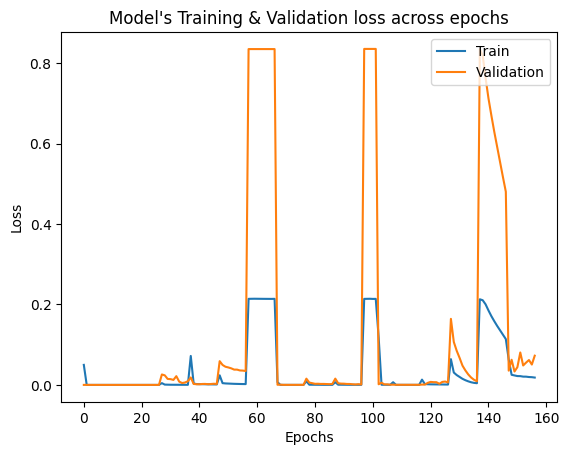

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


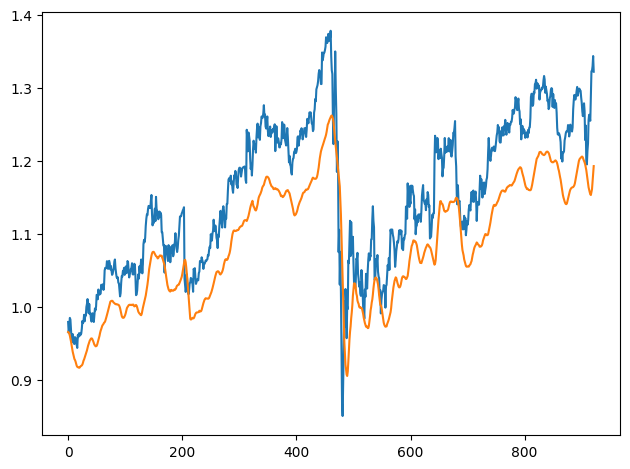

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [487]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss=custom_loss,  optimizer=Adamax(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM L2 U50, dropout custom loss Adamax', X_test, Y_test)


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - val_loss: 0.0168 - val_mean_absolute_error: 0.0167
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - val_loss: 0.0205 - val_mean_absolute_error: 0.0205
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - val_loss: 0.0157 - val_mean_absolute_error: 0.0157
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - val_loss: 0.

Model: "sequential_165"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_176 (LSTM)                 │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_320 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0466 - mean_absolute_error: 0.0466


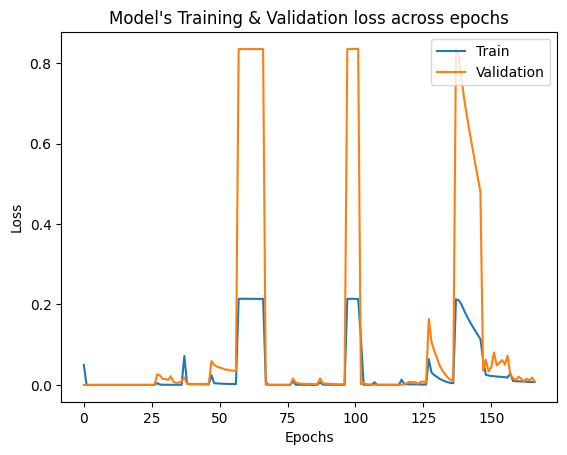

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


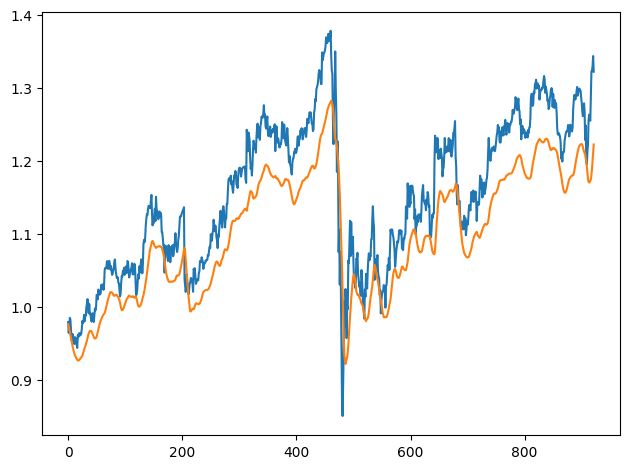

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [488]:


model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dense(1,activation="relu"))
model.compile(loss=custom_loss,  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])

model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM U64, custom loss Adam', X_test, Y_test)

### Convolution

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1186 - val_loss: 0.0081
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - val_loss: 7.4201e-04
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012 - val_loss: 7.3276e-04
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 8/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.2174e-04 - val_loss: 0.0014
Epoch 10/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.4914e-04 - val_loss: 0.0015


Model: "sequential_166"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_145 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_177 (LSTM)                 │ (None, 4, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_178 (LSTM)                 │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_321 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,477 (185.46 KB)

 Trainable params: 15,825 (61.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,652 (123.64 KB)

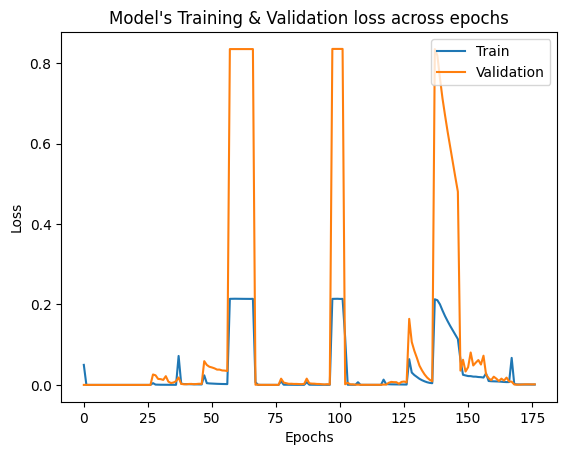

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


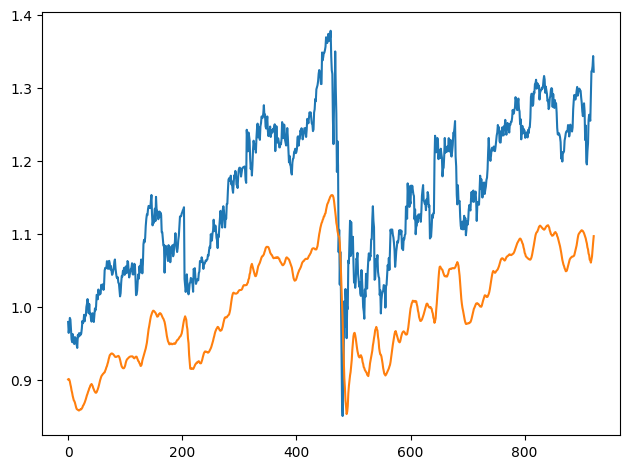

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [489]:

model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_conv.add(MaxPooling1D(pool_size=2))
model_conv.add(Dropout(0.2))
model_conv.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_conv.add(LSTM(16, return_sequences=False))
model_conv.add(Dense(1))

model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])


model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv + LSTM L2 U32,16, dropout  Adam', X_test, Y_test)

### SGD

#### LSTM 2 layers 64,32 Dropout


Epoch 1/50


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2110 - mean_absolute_error: 0.3844 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2131 - mean_absolute_error: 0.3879 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2111 - mean_absolute_error: 0.3839 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2154 - mean_absolute_error: 0.3895 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2103 - mean_absolute_error: 0.3842 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2117 - mean_absolute_error: 0.3866 - val_loss: 0.8347 - val_mean_absolute_error: 0.9088
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2151 - mean_absolute_error: 0.3894 - val_los

Model: "sequential_167"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_179 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_146 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_180 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_147 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_322 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_323 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,903 (124.62 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2037 - mean_absolute_error: 1.0927


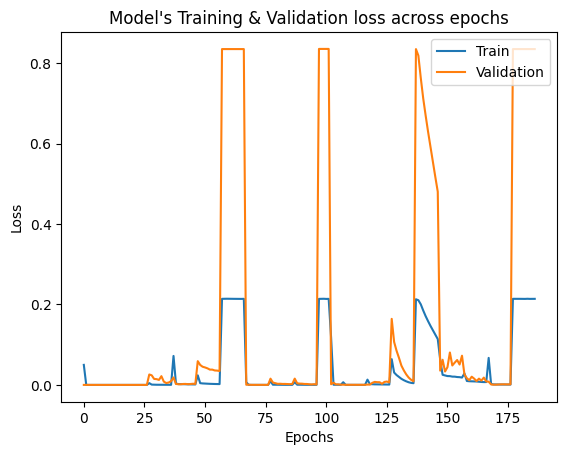

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


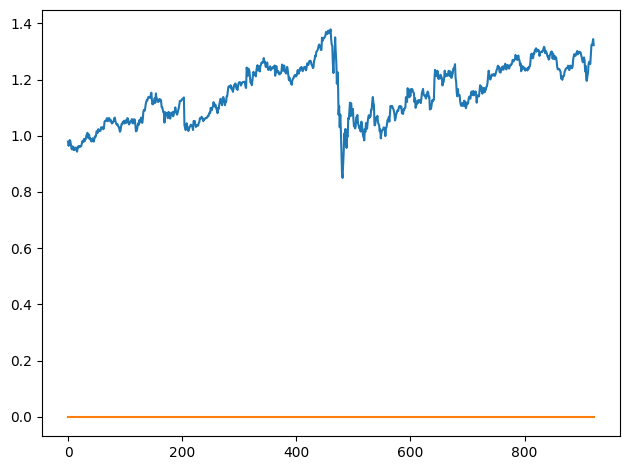

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [490]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=SGD(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 64, 32, dropout SGD ', X_test, Y_test)



## GRU

### Adam

### 4 layers 50 units and dropout

In [491]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=16, callbacks=[history, early_stopping])



Epoch 1/200


407/407 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0090 - mean_absolute_error: 0.0485 - val_loss: 6.9221e-04 - val_mean_absolute_error: 0.0220
Epoch 2/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 5.3563e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0012 - val_mean_absolute_error: 0.0313
Epoch 3/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 3.6037e-04 - mean_absolute_error: 0.0129 - val_loss: 2.2784e-04 - val_mean_absolute_error: 0.0118
Epoch 4/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.8666e-04 - mean_absolute_error: 0.0137 - val_loss: 2.2250e-04 - val_mean_absolute_error: 0.0118
Epoch 5/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 3.2515e-04 - mean_absolute_error: 0.0127 - val_loss: 3.4049e-04 - val_mean_absolute_error: 0.0155
Epoch 6/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 2.9786e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0012 - val_mean_absolute_error: 0.0319
Epoch 7/200
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 

In [492]:
regressorGRU.summary()
result = regressorGRU.evaluate(X_test,Y_test)


Model: "sequential_168"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_100 (GRU)                   │ (None, 10, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_148 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_101 (GRU)                   │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_102 (GRU)                   │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_103 (GRU)                   │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_324 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,705 (631.66 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,804 (421.11 KB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4822e-04 - mean_absolute_error: 0.0200


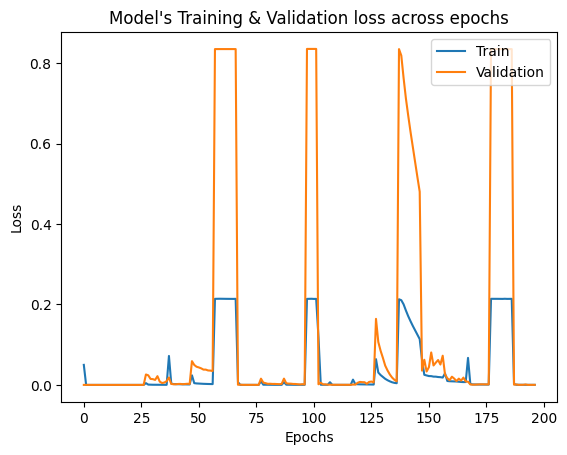

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


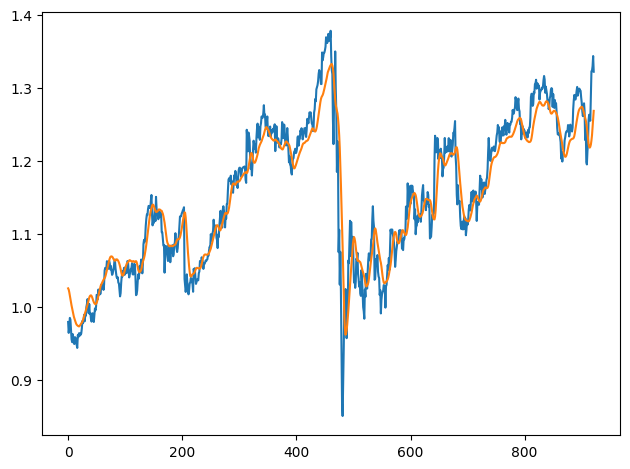

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [493]:

plotloss(history)

print_result(regressorGRU, 'GRU L4 U50, Adam ', X_test, Y_test)


### GRU 2 layers 64,16

Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0113 - mean_absolute_error: 0.0680 - val_loss: 0.0023 - val_mean_absolute_error: 0.0461
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0366 - val_loss: 0.0038 - val_mean_absolute_error: 0.0599
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0019 - mean_absolute_error: 0.0309 - val_loss: 1.7894e-04 - val_mean_absolute_error: 0.0103
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0015 - mean_absolute_error: 0.0286 - val_loss: 0.0021 - val_mean_absolute_error: 0.0437
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0012 - mean_absolute_error: 0.0260 - val_loss: 6.5529e-04 - val_mean_absolute_error: 0.0229
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mean_absolute_error: 0.0250 - val_loss: 0.0011 - val_mean_absolute_error: 0.0299
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mean_absolute_error: 0.0255 

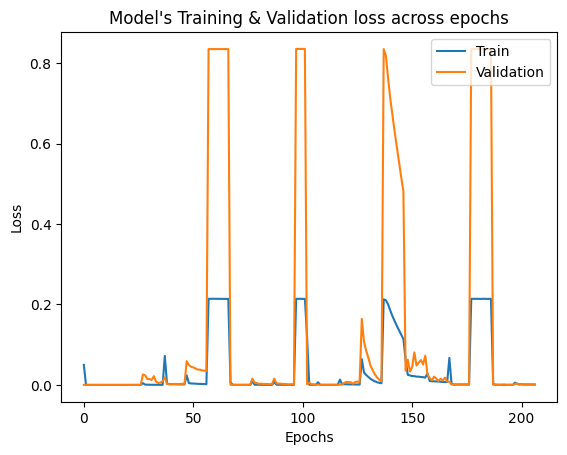

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


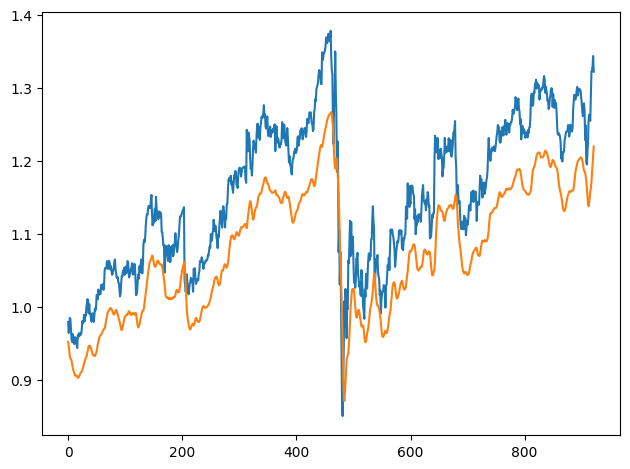

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [494]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=16,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,16, dropout, Adam', X_test, Y_test)

### Adamax 

Epoch 1/200


102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0222 - mean_absolute_error: 0.0932 - val_loss: 6.0441e-04 - val_mean_absolute_error: 0.0206
Epoch 2/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2722e-04 - mean_absolute_error: 0.0149 - val_loss: 7.1520e-04 - val_mean_absolute_error: 0.0227
Epoch 3/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.9487e-04 - mean_absolute_error: 0.0145 - val_loss: 7.0850e-04 - val_mean_absolute_error: 0.0226
Epoch 4/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 4.7205e-04 - mean_absolute_error: 0.0142 - val_loss: 4.1015e-04 - val_mean_absolute_error: 0.0164
Epoch 5/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 4.5224e-04 - mean_absolute_error: 0.0139 - val_loss: 5.5718e-04 - val_mean_absolute_error: 0.0197
Epoch 6/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 4.7125e-04 - mean_absolute_error: 0.0139 - val_loss: 5.1059e-04 - val_mean_absolute_error: 0.0187
Epoch 7/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - 

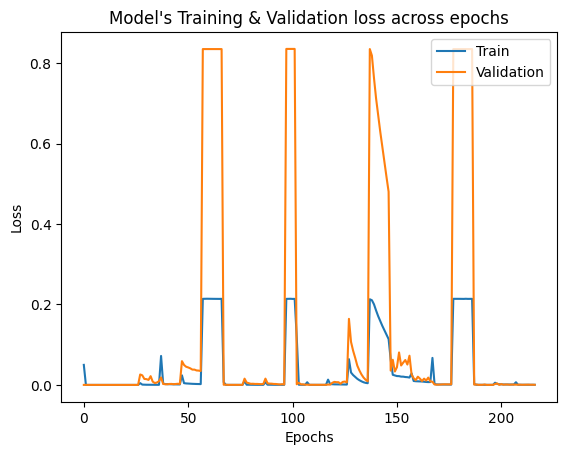

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


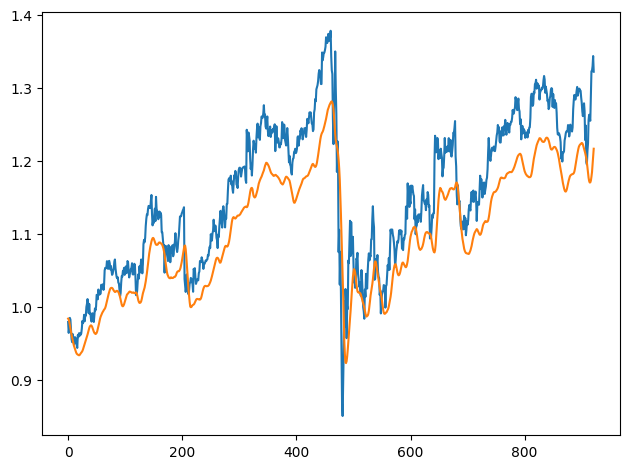

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [495]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) 
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adamax(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L4 U50, Dropout, Adamax ', X_test, Y_test)

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0924 - mean_absolute_error: 0.2095 - val_loss: 1.9366e-04 - val_mean_absolute_error: 0.0107
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0029 - mean_absolute_error: 0.0374 - val_loss: 5.7488e-04 - val_mean_absolute_error: 0.0210
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0028 - mean_absolute_error: 0.0372 - val_loss: 6.7448e-04 - val_mean_absolute_error: 0.0231
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0022 - mean_absolute_error: 0.0329 - val_loss: 5.0428e-04 - val_mean_absolute_error: 0.0194
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0025 - mean_absolute_error: 0.0341 - val_loss: 7.8041e-04 - val_mean_absolute_error: 0.0248
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0022 - mean_absolute_error: 0.0326 - val_loss: 1.9634e-04 - val_mean_absolute_error: 0.0107
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0021 - mean_

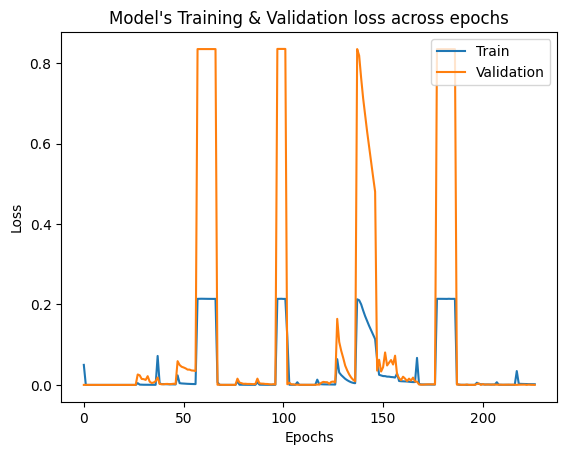

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


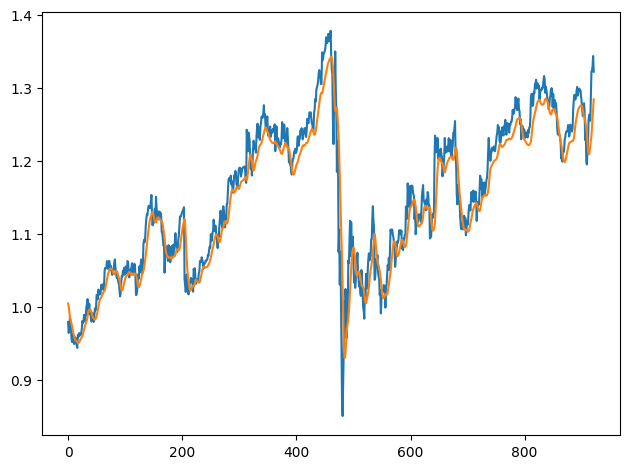

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [496]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) 
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) 
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adamax(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64, 32 dropout, Adamax', X_test, Y_test)

### Adagrad

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0915 - mean_absolute_error: 0.2448 - val_loss: 0.1235 - val_mean_absolute_error: 0.3455
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0280 - mean_absolute_error: 0.1431 - val_loss: 0.0750 - val_mean_absolute_error: 0.2686
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0198 - mean_absolute_error: 0.1189 - val_loss: 0.0508 - val_mean_absolute_error: 0.2210
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0139 - mean_absolute_error: 0.0999 - val_loss: 0.0325 - val_mean_absolute_error: 0.1766
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0101 - mean_absolute_error: 0.0838 - val_loss: 0.0214 - val_mean_absolute_error: 0.1431
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0074 - mean_absolute_error: 0.0706 - val_loss: 0.0143 - val_mean_absolute_error: 0.1168
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0633 -

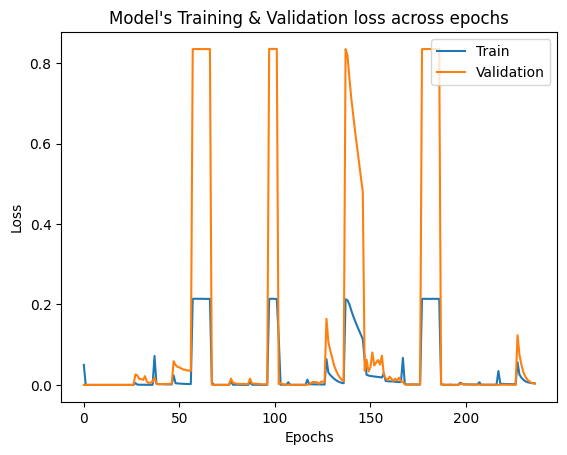

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


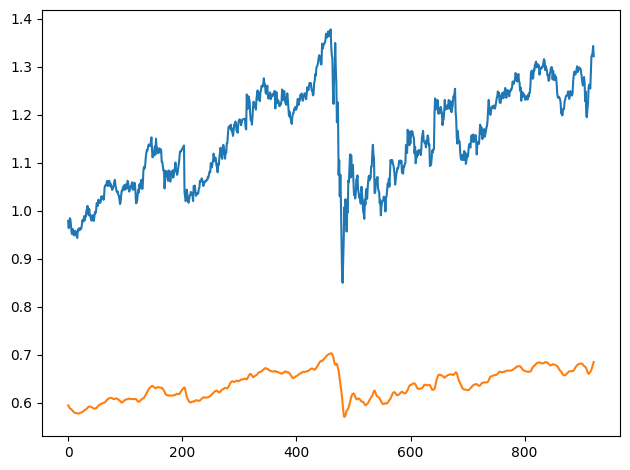

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [497]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adagrad(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,32 dropout, Adagrad', X_test, Y_test)

### SDG

In [498]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=SGD(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])


Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0829 - mean_absolute_error: 0.2357 - val_loss: 0.1467 - val_mean_absolute_error: 0.3771
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0324 - mean_absolute_error: 0.1563 - val_loss: 0.1096 - val_mean_absolute_error: 0.3255
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0261 - mean_absolute_error: 0.1371 - val_loss: 0.0850 - val_mean_absolute_error: 0.2865
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0210 - mean_absolute_error: 0.1228 - val_loss: 0.0665 - val_mean_absolute_error: 0.2531
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0181 - mean_absolute_error: 0.1139 - val_loss: 0.0531 - val_mean_absolute_error: 0.2262
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0142 - mean_absolute_error: 0.1006 - val_loss: 0.0418 - val_mean_absolute_error: 0.2006
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0115 - mean_absolute_error: 0.0897 -

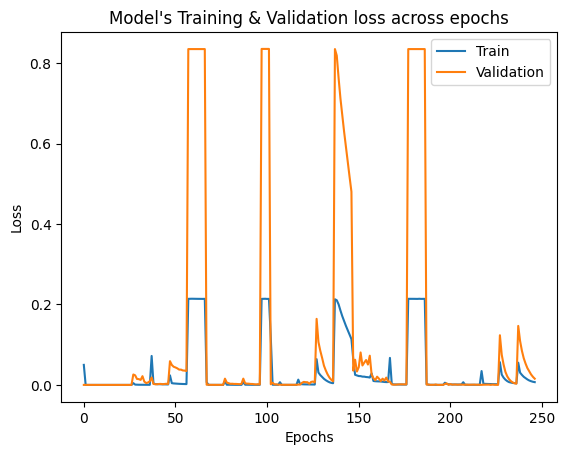

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


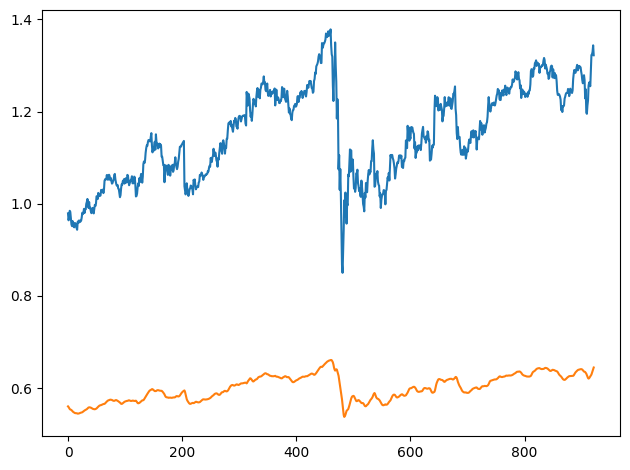

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [499]:

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,32 dropout, SGD', X_test, Y_test)

### Convolution

Epoch 1/200


204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1548 - val_loss: 0.0484
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0092 - val_loss: 0.0066
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0025 - val_loss: 0.0045
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021 - val_loss: 0.0043
Epoch 8/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0046
Epoch 9/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 10/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020 - val_loss: 0.0032


Model: "sequential_174"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_158 (Dropout)           │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_116 (GRU)                   │ (None, 1, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_117 (GRU)                   │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_330 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,973 (406.15 KB)

 Trainable params: 34,657 (135.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,316 (270.77 KB)

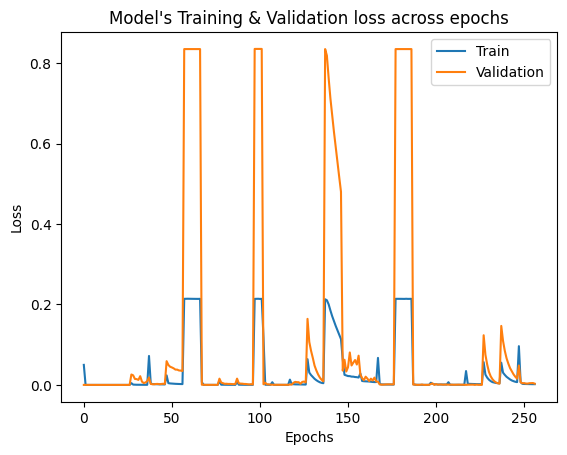

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


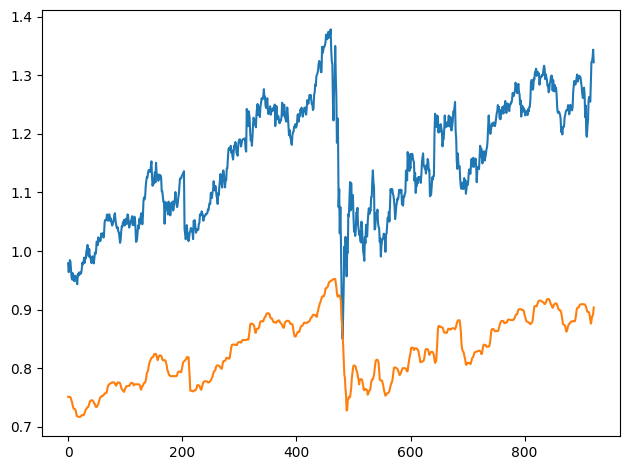

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [500]:

model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_conv.add(MaxPooling1D(pool_size=5))
model_conv.add(Dropout(0.2))
model_conv.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
model_conv.add(GRU(units=32,activation='tanh'))
model_conv.add(Dense(1))

model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv + GRU L2 U64,32, dropout, Adam', X_test, Y_test)

### custom loss

Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - val_loss: 0.0543 - val_mean_absolute_error: 0.0542
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - val_loss: 0.0640 - val_mean_absolute_error: 0.0639
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - val_loss: 0.0765 - val_mean_absolute_error: 0.0764
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - val_loss: 0.0567 - val_mean_absolute_error: 0.0566
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - val_loss: 0.0356 - val_mean_absolute_error: 0.0355
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - val_loss: 0.0238 - val_mean_absolute_error: 0.0237
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 -

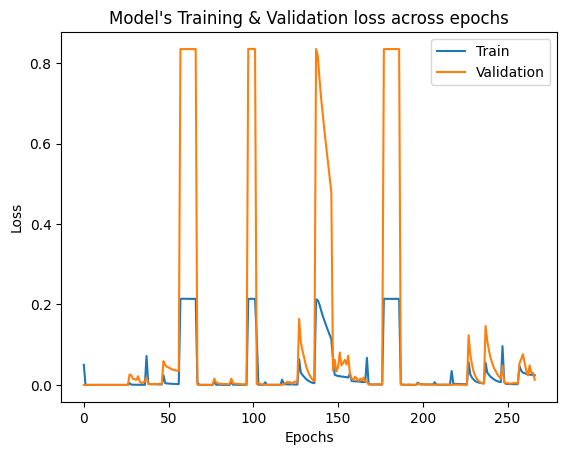

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


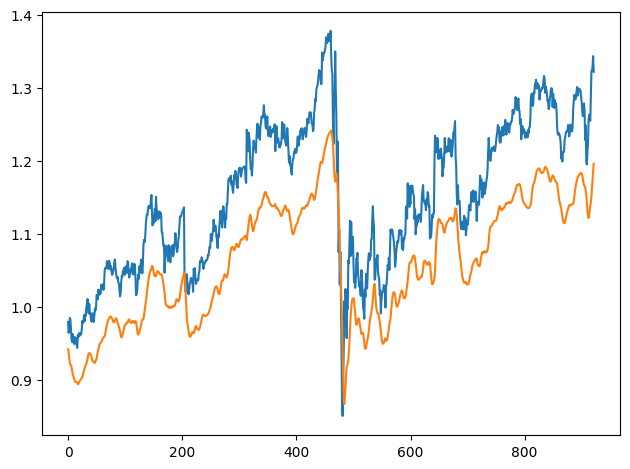

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [501]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=16,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = custom_loss)
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L2 U64,32, Dropout, custom loss, Adam ', X_test, Y_test)

## Fully connected

Epoch 1/200


652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0707 - val_loss: 0.0991
Epoch 2/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0644 - val_loss: 0.0836
Epoch 3/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0609 - val_loss: 0.0641
Epoch 4/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0526 - val_loss: 0.0494
Epoch 5/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0494 - val_loss: 0.0405
Epoch 6/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0453 - val_loss: 0.0307
Epoch 7/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0405 - val_loss: 0.0232
Epoch 8/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0377 - val_loss: 0.0175
Epoch 9/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0336 - val_loss: 0.0131
Epoch 10/200
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0314 - val_loss: 0.0104


Model: "sequential_176"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_332 (Dense)               │ (None, 10, 12)         │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_333 (Dense)               │ (None, 10, 8)          │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_334 (Dense)               │ (None, 10, 1)          │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 413 (1.62 KB)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 276 (1.08 KB)

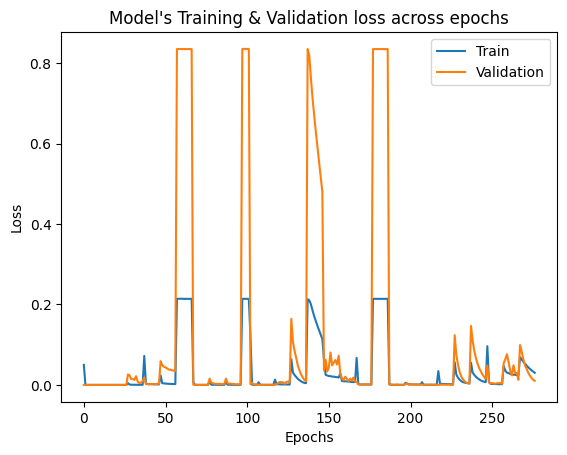

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2196 


0.26953113079071045

In [502]:

model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=10, callbacks=[history, early_stopping])


model.summary()

plotloss(history)

accuracy = model.evaluate(X_test, Y_test)

accuracy


# drugi nacin

In [503]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [504]:
data

,Close
Date,
1985-01-02,1.289063
1985-01-03,1.302083
1985-01-04,1.299479
1985-01-07,1.307292
1985-01-08,1.309896
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [505]:
data2 = data.copy()
data2

,Close
Date,
1985-01-02,1.289063
1985-01-03,1.302083
1985-01-04,1.299479
1985-01-07,1.307292
1985-01-08,1.309896
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [506]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df


windowed_df = df_to_windowed_df(data, '1985-01-07', '2021-12-17', n=3)

windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1985-01-07,1.289063,1.302083,1.299479,1.307292
1,1985-01-08,1.302083,1.299479,1.307292,1.309896
2,1985-01-09,1.299479,1.307292,1.309896,1.328125
3,1985-01-10,1.307292,1.309896,1.328125,1.341146
4,1985-01-11,1.309896,1.328125,1.341146,1.335938
...,...,...,...,...,...
9310,2021-12-13,55.000000,54.860001,56.279999,57.759998
9311,2021-12-14,54.860001,56.279999,57.759998,57.799999
9312,2021-12-15,56.279999,57.759998,57.799999,58.060001
9313,2021-12-16,57.759998,57.799999,58.060001,58.650002


## Priprema podataka

In [507]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((9315,), (9315, 3, 1), (9315,))

In [508]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train_1, y_train_1 = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val_1, y_val_1 = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test_1, y_test_1 = dates[q_90:], X[q_90:], y[q_90:]

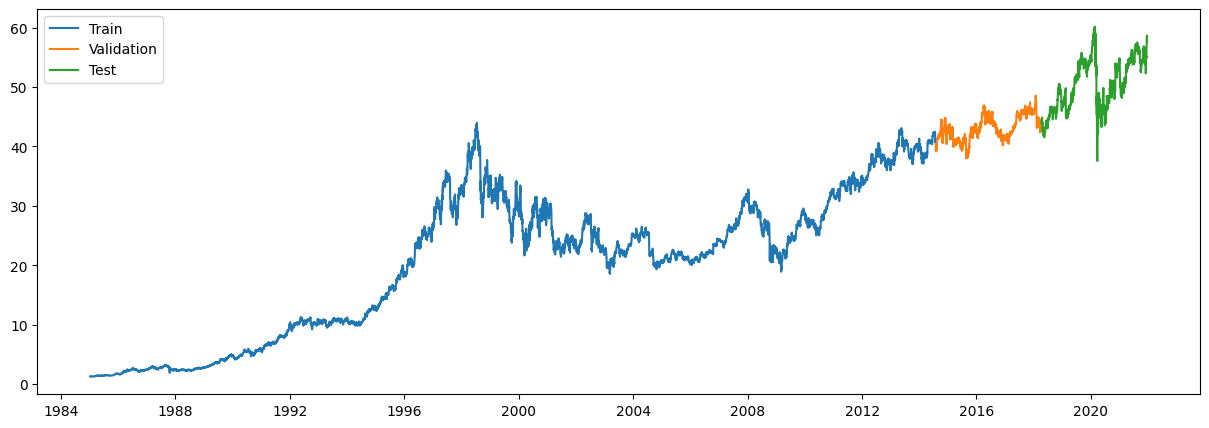

In [509]:
plt.figure(figsize=(15,5))
plt.plot(dates_train, y_train_1)
plt.plot(dates_val, y_val_1)
plt.plot(dates_test, y_test_1)

plt.legend(['Train', 'Validation', 'Test'])

## Modeli

### lstm

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 236.2825 - mean_absolute_error: 10.4052 - val_loss: 4.1199 - val_mean_absolute_error: 1.7026
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1573 - mean_absolute_error: 0.2536 - val_loss: 1.6125 - val_mean_absolute_error: 0.9688
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1672 - mean_absolute_error: 0.2744 - val_loss: 1.3877 - val_mean_absolute_error: 0.9168
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1399 - mean_absolute_error: 0.2439 - val_loss: 0.9973 - val_mean_absolute_error: 0.7480
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1529 - mean_absolute_error: 0.2643 - val_loss: 1.5195 - val_mean_absolute_error: 1.0271
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1392 - mean_absolute_error: 0.2392 - val_loss: 0.9782 - val_mean_absolute_error: 0.7675
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1320 - mean_absolute_error: 0.2404 - val_loss:

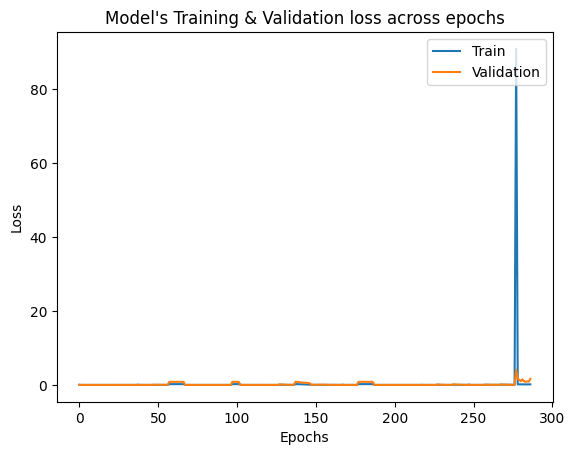

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


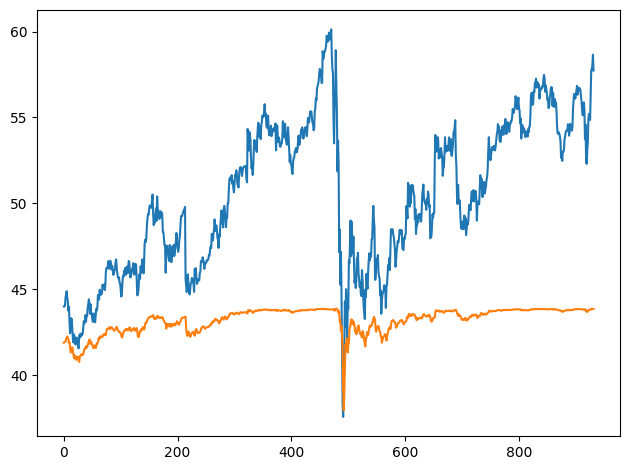

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [510]:

model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = False,  input_shape = (X_train_1.shape[1],X_train_1.shape[2])))

model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

plotloss(history)
print_result(model, 'Data 2, LSTM U64, fully connected, Adam', X_test_1, y_test_1)


### GRU 128,64

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 144.0418 - mean_absolute_error: 7.1975 - val_loss: 1.7425 - val_mean_absolute_error: 0.9932
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1421 - mean_absolute_error: 0.2512 - val_loss: 1.5532 - val_mean_absolute_error: 0.9581
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1636 - mean_absolute_error: 0.2664 - val_loss: 1.1766 - val_mean_absolute_error: 0.8054
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1668 - mean_absolute_error: 0.2774 - val_loss: 1.4223 - val_mean_absolute_error: 0.9182
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1839 - mean_absolute_error: 0.2937 - val_loss: 1.6078 - val_mean_absolute_error: 0.9875
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1604 - mean_absolute_error: 0.2649 - val_loss: 1.4782 - val_mean_absolute_error: 0.9256
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1857 - mean_absolute_error: 0.2868 - val_loss: 

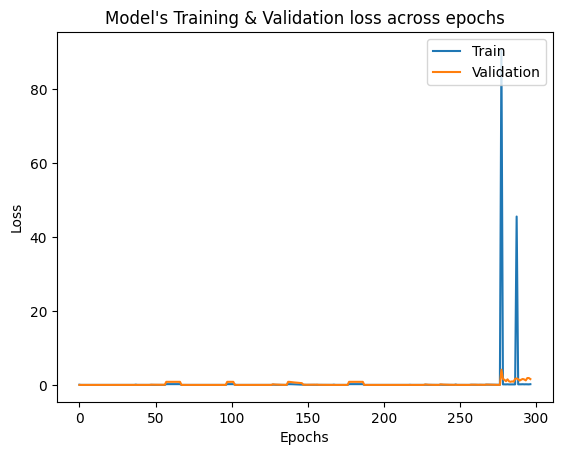

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


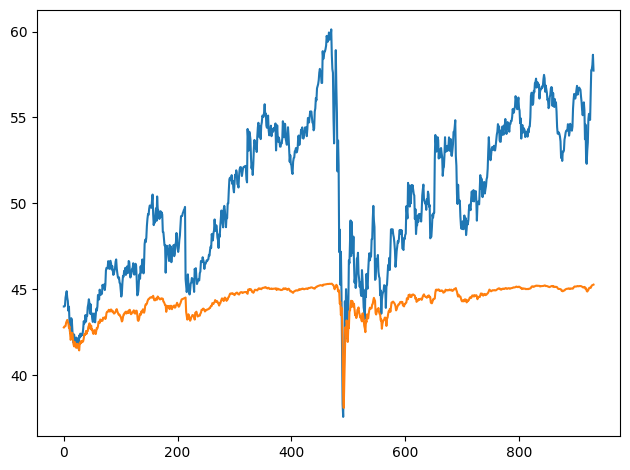

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [511]:
model = tf.keras.Sequential()
model.add(GRU(128,  return_sequences=True, input_shape = (X_train_1.shape[1],X_train_1.shape[2])))
model.add(GRU(64))

model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

plotloss(history)
print_result(model, 'Data 2 GRU L2 U128,64, Adam', X_test_1, y_test_1)




### LSTM Bidirectional

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 234.1115 - mean_absolute_error: 10.2687 - val_loss: 2.6433 - val_mean_absolute_error: 1.3439
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2257 - mean_absolute_error: 0.3122 - val_loss: 1.8114 - val_mean_absolute_error: 1.1325
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1998 - mean_absolute_error: 0.2869 - val_loss: 1.4076 - val_mean_absolute_error: 0.9969
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1663 - mean_absolute_error: 0.2625 - val_loss: 0.6961 - val_mean_absolute_error: 0.6413
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1629 - mean_absolute_error: 0.2630 - val_loss: 0.7374 - val_mean_absolute_error: 0.6711
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1577 - mean_absolute_error: 0.2649 - val_loss: 0.5493 - val_mean_absolute_error: 0.5687
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1346 - mean_absolute_error: 0.2433 - val_loss:

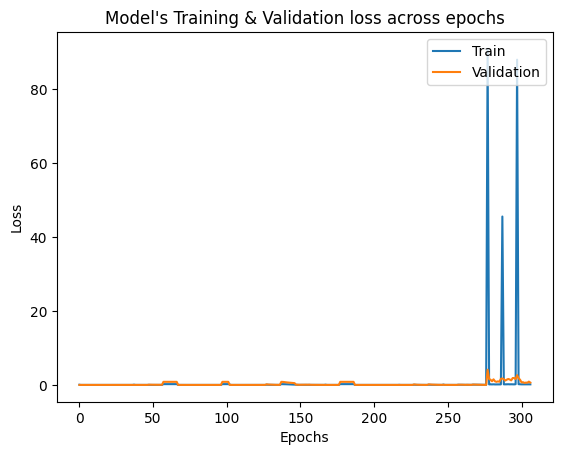

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


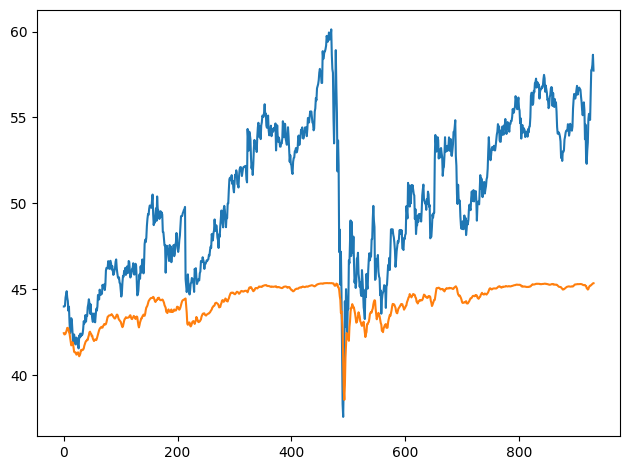

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [512]:
from keras.layers import  Bidirectional

model = tf.keras.Sequential()
model.add(Bidirectional(LSTM(64, input_shape = (X_train_1.shape[1],X_train_1.shape[2])) ))

model.add(Dense(64,activation="relu"))

model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])


plotloss(history)
print_result(model, 'Data 2 Bidirectional LSTM 64', X_test_1, y_test_1)

### LSTM 64,32, Dropout

In [513]:


model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences=True, input_shape = (X_train_1.shape[1],X_train_1.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences=False))


model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))


model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

Model: "sequential_180"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_183 (LSTM)                 │ (None, 3, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_161 (Dropout)           │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_184 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_347 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_348 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_349 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_350 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_351 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 211.1524 - mean_absolute_error: 9.6833 - val_loss: 3.7778 - val_mean_absolute_error: 1.5865
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9716 - mean_absolute_error: 0.7296 - val_loss: 2.1707 - val_mean_absolute_error: 1.1237
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7249 - mean_absolute_error: 0.6299 - val_loss: 1.4293 - val_mean_absolute_error: 0.9583
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6422 - mean_absolute_error: 0.5854 - val_loss: 1.3042 - val_mean_absolute_error: 0.8720
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4839 - mean_absolute_error: 0.5117 - val_loss: 3.1116 - val_mean_absolute_error: 1.5551
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4676 - mean_absolute_error: 0.4998 - val_loss: 2.2198 - val_mean_absolute_error: 1.2478
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4029 - mean_absolute_error: 0.4629 - val_loss:

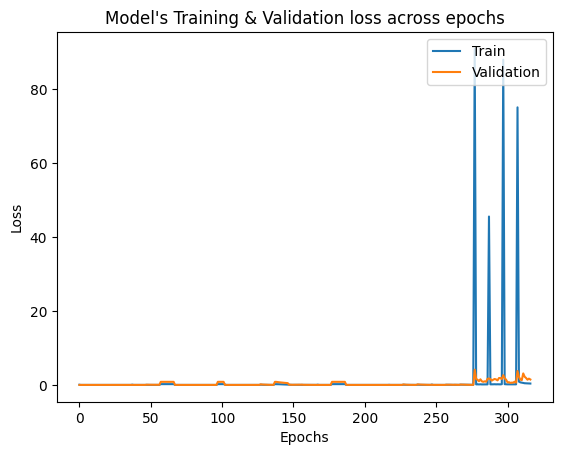

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


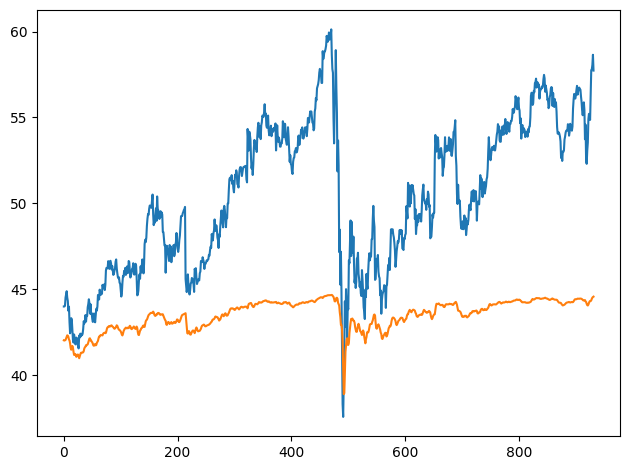

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
1,"SimpleRNN L4 U50, Dropout, Adam",0.313082,-9.110847,0.104345
2,Conv + SimpleRNN U20 dropout Adam,0.211817,-3.522170,0.046669
3,"SimpleRNN U32, Dropout, SGD 0.001",0.445005,-19.070391,0.207129
4,"LSTM U64, Adam",1.151376,-128.454301,1.335988
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
6,"LSTM L2 U64,32 Adam",0.301379,-8.589511,0.098965
7,"LSTM U32, 16, Dropout, Adam",0.291287,-7.941963,0.092282
8,"LSTM L4 U50, dropout, Adam",1.151376,-128.454301,1.335988
9,LSTM U64 Adamax,0.040103,0.761917,0.002457


In [514]:
plotloss(history)
print_result(model, 'Data 2 LSTM L2 u64,32, Dropout, Adam', X_test_1, y_test_1)

# result

In [515]:
results.sort_values(by='mean sqrd')

,Model,mean abs,R2,mean sqrd
20,"GRU L2 U64, 32 dropout, Adamax",0.021964,0.914108,0.000886
17,"GRU L4 U50, Adam",0.022694,0.894877,0.001085
0,"SimpleRNN U32, Adam",0.029388,0.873057,0.001310
9,LSTM U64 Adamax,0.040103,0.761917,0.002457
5,"LSTM U64, fully connected, Adam",0.044870,0.747198,0.002609
19,"GRU L4 U50, Dropout, Adamax",0.052495,0.659480,0.003514
14,"LSTM U64, custom loss Adam",0.055090,0.642351,0.003691
10,"LSTM L2 U50, dropout Adamax",0.057574,0.592618,0.004204
13,"LSTM L2 U50, dropout custom loss Adamax",0.069290,0.449398,0.005682
18,"GRU L2 U64,16, dropout, Adam",0.074760,0.406736,0.006123
